In [1]:
#pip install lightgbm
#!pip install xgboost

In [2]:
# Librerías básicas para manipulación y análisis de datos
import os
import pandas as pd
import numpy as np

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Librerías para preprocesamiento y evaluación
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, precision_recall_curve, f1_score, make_scorer

# Modelos (regresión y clasificación)
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
import xgboost as xgb

# Otras utilidades
import warnings
warnings.filterwarnings("ignore")

In [3]:
# path relativo de la carpeta "stores"
store_path = os.path.join("stores")

In [4]:
train_personas_path = os.path.join(store_path, "train_personas.csv")

test_personas_path = os.path.join(store_path, "test_personas.csv")

In [5]:
# Obtener el directorio actual
current_dir = os.getcwd()
current_dir

'C:\\Users\\vmascaro\\Desktop\\UNLP\\Machine_Learning\\ML_UNLP\\PS2\\scripts'

In [6]:
# Subir un nivel en el directorio, para salir de 'scripts'
repo_dir = os.path.abspath(os.path.join(current_dir, '../'))

# Cambiar al directorio ML_UNLP
os.chdir(repo_dir)

# Verificar que se cambió al directorio correcto
print("Directorio actual:", os.getcwd())

Directorio actual: C:\Users\vmascaro\Desktop\UNLP\Machine_Learning\ML_UNLP\PS2


## Carga de Datos

In [7]:
# Train
train_personas = pd.read_csv("stores/train_personas.csv")
train_personas.head()

,id,Orden,Clase,Dominio,Estrato1,P6020,P6040,P6050,P6090,P6100,...,Iof2es,Iof3hes,Iof3ies,Iof6es,Ingtotob,Ingtotes,Ingtot,Fex_c,Depto,Fex_dpto
0,8d0193e328305a042001a35f,2,1,MEDELLIN,2,2,38,2,1.0,1.0,...,NaN,NaN,NaN,NaN,1.109190e+06,NaN,1.109190e+06,127.222038,5,146.25179
1,8d0193e328305a042001a35f,5,1,MEDELLIN,2,1,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179
2,8d0193e328305a042001a35f,1,1,MEDELLIN,2,1,41,1,1.0,1.0,...,NaN,NaN,NaN,NaN,1.399140e+06,NaN,1.399140e+06,127.222038,5,146.25179
3,8d0193e328305a042001a35f,4,1,MEDELLIN,2,1,3,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179
4,8d0193e328305a042001a35f,3,1,MEDELLIN,2,1,11,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.222038,5,146.25179


In [8]:
train_personas.shape

(543109, 135)

In [9]:
train_personas.columns

Index(['id', 'Orden', 'Clase', 'Dominio', 'Estrato1', 'P6020', 'P6040',
       'P6050', 'P6090', 'P6100',
       ...
       'Iof2es', 'Iof3hes', 'Iof3ies', 'Iof6es', 'Ingtotob', 'Ingtotes',
       'Ingtot', 'Fex_c', 'Depto', 'Fex_dpto'],
      dtype='object', length=135)

In [10]:
# Imprimir el tipo de dato para cada columna
print("Tipos de dato para cada columna:")
print(train_personas.dtypes)

# Filtrar columnas que son de tipo string (object en pandas)
string_columns = train_personas.select_dtypes(include=['object']).columns

# Imprimir las columnas de tipo string
print("\nColumnas de tipo string:")
print(string_columns)

Tipos de dato para cada columna:
id           object
Orden         int64
Clase         int64
Dominio      object
Estrato1      int64
             ...   
Ingtotes    float64
Ingtot      float64
Fex_c       float64
Depto         int64
Fex_dpto    float64
Length: 135, dtype: object

Columnas de tipo string:
Index(['id', 'Dominio'], dtype='object')


In [11]:
# Test
test_personas = pd.read_csv("stores/test_personas.csv")
test_personas.head()

,id,Orden,Clase,Dominio,P6020,P6040,P6050,P6090,P6100,P6210,...,P7510s5,P7510s6,P7510s7,Pet,Oc,Des,Ina,Fex_c,Depto,Fex_dpto
0,3279230a4917cdf883df34cd,1,1,MEDELLIN,1,33,1,1.0,1.0,6.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,125.720226,5,126.041802
1,3279230a4917cdf883df34cd,3,1,MEDELLIN,2,7,3,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.720226,5,126.041802
2,3279230a4917cdf883df34cd,2,1,MEDELLIN,2,37,2,1.0,1.0,6.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,125.720226,5,126.041802
3,3279230a4917cdf883df34cd,4,1,MEDELLIN,1,5,3,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.720226,5,126.041802
4,01bd1f72445acc719d19bd25,1,1,MEDELLIN,1,27,1,1.0,1.0,5.0,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,73.359246,5,64.143748


In [12]:
test_personas.shape

(219644, 63)

## Variables


**Posibles Target**
- `Ingtot`: Ingreso total (seleccionada)
- `Ingtotob`: Ingreso total observado
- `Ingtotes`: Ingreso total imputado


**Varibles de Train, que podrían no estar en Test**
- `id`: primary key identificadora, usada para conectar con las observacioens del dataset personas con dataset viviendas.
- `Orden`: Identificación de la persona.
- `Clase`: área urbana vs rural. 1: Cabecera (urbano). 2: Resto (rural)
- `Dominio`: cada una de las 24 a.M., otras cabeceras y resto
- `P6050`: ¿cuál es el parentesco de ...Con el jefe o jefa del hogar? 


- `Mes`: Mes del registro
- `Estrato1`: Estrato de energía para las 13 a.M., y sextil de ICV para otras cabeceras y resto
- `P6020`: Sexo  
- `P6040`: ¿Cuántos años cumplidos tiene?  
- `P6050`: ¿Cuál es el parentesco de ... con el jefe o jefa del hogar?  
- `P6090`: ¿... está afiliado, es cotizante o es beneficiario de alguna entidad de seguridad social en salud?  
- `P6100`: ¿A cuál de los siguientes regímenes de seguridad social en salud está afiliado?  
- `P6210`: ¿Cuál es el nivel educativo más alto alcanzado por ... y el último año o grado aprobado en este nivel?  
- `P6210s1`: Grado escolar aprobado  
- `P6240`: ¿En qué actividad ocupó ... la mayor parte del tiempo la semana pasada?  
- `Oficio`: ¿Qué hace ... en este trabajo?  
- `P6426`: ¿Cuánto tiempo lleva ... trabajando en esta empresa, negocio, industria, oficina, firma o finca de manera continua?  
- `P6430`: En este trabajo es … (posición ocupacional primera actividad)  
- `P6500`: Antes de descuentos, ¿cuánto ganó ... el mes pasado en este empleo?  
- `P6510`: ¿El mes pasado recibió ingresos por concepto de horas extras?  
- `P6510s1`: ¿Cuánto recibió por horas extras?  
- `P6510s2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6545`: El mes pasado recibió a. Primas (técnica, de antigüedad, clima, orden público, otras, etc.)  
- `P6545s1`: ¿Cuánto recibió por primas?  
- `P6545s2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6580`: ¿El mes pasado recibió b. Bonificaciones?  
- `P6580s1`: ¿Cuánto recibió por bonificaciones?  
- `P6580s2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6585s1`: ¿El mes pasado recibió a. Auxilio o subsidio de alimentación?  
- `P6585s1a1`: ¿Cuánto recibió por subsidio de alimentación?  
- `P6585s1a2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6585s2`: ¿El mes pasado recibió b. Auxilio subsidio de transporte?  
- `P6585s2a1`: ¿Cuánto recibió por subsidio de transporte?  
- `P6585s2a2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6585s3`: ¿El mes pasado recibió c. Subsidio familiar?  
- `P6585s3a1`: ¿Cuánto recibió por subsidio familiar?  
- `P6585s3a2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6585s4`: ¿El mes pasado recibió d. Subsidio educativo?  
- `P6585s4a1`: ¿Cuánto recibió por subsidio educativo?  
- `P6585s4a2`: ¿Incluyó este valor en los ingresos del mes pasado?  
- `P6590`: Además del salario en dinero, ¿el mes pasado recibió alimentos como parte de pago por su trabajo?  
- `P6590s1`: ¿En cuánto estima lo que recibió?  
- `P6600`: Además del salario en dinero, ¿el mes pasado recibió vivienda como parte de pago por su trabajo?  
- `P6600s1`: ¿En cuánto estima lo que recibió?  
- `P6610`: ¿Normalmente ... utiliza transporte de la empresa para desplazarse a su trabajo (bus o automóvil)?  
- `P6610s1`: ¿En cuánto estima lo que recibió?  
- `P6620`: Además del salario en dinero, ¿el mes pasado recibió otros ingresos en especie por su trabajo (electrodomésticos, ropa, productos diferentes a alimentos o bonos tipo Sodexo)?  
- `P6620s1`: ¿En cuánto estima lo que recibió?  
- `P6630s1`: En los últimos 12 meses recibió … a. Prima de servicios  
- `P6630s1a1`: ¿Cuánto recibió?  
- `P6630s2`: En los últimos 12 meses recibió ... b. Prima de Navidad  
- `P6630s2a1`: ¿Cuánto recibió?  
- `P6630s3`: En los últimos 12 meses recibió … c. Prima de vacaciones  
- `P6630s3a1`: ¿Cuánto recibió?  
- `P6630s4`: En los últimos 12 meses recibió ... d. Viáticos permanentes  
- `P6630s4a1`: ¿Cuánto recibió?  
- `P6630s6`: En los últimos 12 meses recibió … e. Bonificaciones anuales  
- `P6630s6a1`: ¿Cuánto recibió?  
- `P6750`: ¿Cuál fue la ganancia neta o los honorarios netos de ... en esa actividad, negocio, profesión o finca, el mes pasado?  
- `P6760`: ¿A cuántos meses corresponde lo que recibió?  
- `P550`: ¿Cuál fue la ganancia neta del negocio o de la cosecha durante los últimos doce meses?  
- `P6800`: ¿Cuántas horas a la semana trabaja normalmente ... en ese trabajo?  
- `P6870`: ¿Cuántas personas en total tiene la empresa, negocio, industria, oficina, firma, finca o sitio donde ... trabaja?  
- `P6920`: ¿Está ... cotizando actualmente a un fondo de pensiones?  
- `P7040`: Además de la ocupación principal, ¿... tenía la semana pasada otro trabajo o negocio?  
- `P7045`: ¿Cuántas horas trabajó ... la semana pasada en ese segundo trabajo?  
- `P7050`: En ese segundo trabajo… es: (ocupación segunda actividad)  
- `P7070`: ¿Cuánto recibió o ganó ... el mes pasado en ese segundo trabajo o negocio?  
- `P7090`: Además de las horas que trabaja actualmente, ¿... quiere trabajar más horas?  
- `P7110`: Durante las últimas 4 semanas, ¿... hizo diligencias para trabajar más horas?  
- `P7120`: Si la semana pasada le hubiera resultado la posibilidad de trabajar más horas, ¿estaba ... disponible para hacerlo?  
- `P7140s1`: ¿Por qué motivos ... desea cambiar de trabajo o empleo: a. Para mejorar la utilización de sus capacidades o formación?  
- `P7140s2`: ¿Por qué motivos ... desea cambiar de trabajo o empleo: b. Desea mejorar sus ingresos?  
- `P7150`: Durante las últimas 4 semanas, ¿... hizo diligencias para cambiar de trabajo?  
- `P7160`: Si le resultara un nuevo trabajo o empleo, ¿podría ... empezar a desempeñarlo antes de un mes?  
- `P7310`: ¿... ha buscado trabajo por primera vez o había trabajado antes por lo menos durante dos semanas consecutivas?  
- `P7350`: En este último trabajo era: (Desocupados)  
- `P7422`: ¿Recibió o ganó el mes pasado ingresos por concepto de trabajo? (Desocupados)  
- `P7422s1`: ¿Cuánto?  
- `P7472`: ¿Recibió o ganó el mes pasado ingresos por concepto de trabajo? (Desocupados)  
- `P7472s1`: ¿Cuánto?  
- `P7495`: El mes pasado, ¿recibió pagos por concepto de arriendos y/o pensiones?  
- `P7500s1`: ¿El mes pasado, recibió pagos por: a. Arriendos de casas, apartamentos, fincas, lotes, vehículos, equipos, etc.?  
- `P7500s1a1`: Valor mes pasado  
- `P7500s2`: ¿El mes pasado recibió pagos por b. Pensiones o jubilaciones por vejez, invalidez o sustitución pensional?  
- `P7500s2a1`: Valor mes pasado  
- `P7500s3`: ¿El mes pasado recibió pagos por c. Pensión alimenticia por paternidad, divorcio o separación?  
- `P7500s3a1`: Valor mes pasado  
- `P7505`: Durante los últimos doce meses, ¿recibió dinero de otros hogares, personas o instituciones no gubernamentales; dinero por intereses, dividendos, utilidades o por cesantías?  
- `P7510s1`: Durante los últimos 12 meses, ¿recibió a. Dinero de otros hogares o personas residentes en el país?  
- `P7510s1a1`: Valor  
- `P7510s2`: Durante los últimos 12 meses, ¿recibió b. Dinero de otros hogares o personas residentes fuera del país?  
- `P7510s2a1`: Valor  
- `P7510s3`: Durante los últimos 12 meses, ¿recibió c. Ayudas en dinero de instituciones del país?  
- `P7510s3a1`: Valor  
- `P7510s5`: Durante los últimos 12 meses, ¿recibió d. Dinero por intereses de préstamos o CDT´s, depósitos de ahorros, utilidades, ganancias o dividendos por inversiones?

- `P7510s5a1`: Valor $ ___________

- `P7510s6`: Durante los últimos 12 meses, ¿recibió e. dinero por concepto de cesantías y/o intereses a las cesantías?
- `P7510s6a1`: Valor $ ___________

- `P7510s7`: Durante los últimos 12 meses, ¿recibió f. dinero de otras fuentes diferentes a las anteriores?
- `P7510s7a1`: Valor $ ___________


- `Pet`: Población en edad de trabajar (1: sí, 0: no)
- `Oc`: Ocupado (1: sí)
- `Des`: Desocupado (1: sí)
- `Ina`: Inactivo (1: sí)

- `Impa`: Ingreso monetario de la primera actividad antes de imputación
- `Isa`: Ingreso monetario de la segunda actividad antes de imputación
- `Ie`: Ingreso en especie antes de imputación
- `Imdi`: Ingreso por trabajo de desocupados e inactivos antes de imputación
- 
- `Iof1`: Ingreso por intereses y dividendos antes de imputación
- `Iof2`: Ingreso por jubilaciones y pensiones antes de imputación
- `Iof3h`: Ingreso por ayudas de hogares, antes de imputación
- `Iof3i`: Ingreso por ayudas de instituciones, antes de imputación
- `Iof6`: Ingreso por arriendos antes de imputación

- `Cclasnr2`: Estado de `impa` (1: faltante, 0: observado)
- `Cclasnr3`: Estado de `isa` (1: faltante, 0: observado)
- `Cclasnr4`: Estado de `ie` (1: faltante, 0: observado)
- `Cclasnr5`: Estado de `imdi` (1: faltante, 0: observado)
- `Cclasnr6`: Estado de `iof1` (1: faltante, 0: observado)
- `Cclasnr7`: Estado de `iof2` (1: faltante, 0: observado)
- `Cclasnr8`: Estado de `iof3` (1: faltante, 0: observado)
- `Cclasnr11`: Estado de `iof6` (1: faltante, 0: observado)

- `Impaes`: Ingreso monetario de la primera actividad imputado (sólo para faltantes, extremos o ceros inconsistentes)
- `Isaes`: Ingreso monetario de la segunda actividad imputado (sólo para faltantes o extremos)
- `Iees`: Ingreso en especie imputado (sólo para faltantes o extremos)
- `Imdies`: Ingreso por trabajo de desocupados e inactivos imputado (sólo para faltantes o extremos)
- `Iof1es`: Ingreso por intereses y dividendos imputado (sólo para faltantes o extremos)
- `Iof2es`: Ingreso por jubilaciones y pensiones imputado (sólo para faltantes o extremos)
- `Iof3hes`: Ingreso por ayudas de hogares, imputado (sólo para faltantes o extremos)
- `Iof3ies`: Ingreso por ayudas de instituciones, imputado (sólo para faltantes o extremos)
- `Iof6es`: Ingreso por arriendos imputado (sólo para faltantes o extremos)

- `Fex_c`: Factor de expansión anualizado
- `Depto`: Departamento
- `Fex_dpto`: Factor de expansión departamental


## Limpieza de Columnas

### Variables presentes en Train set pero no en Test set.

Inicialmente se analizan aquellas variables presentes en Train pero no en Test. Posteriormente en otra sección, se eliminarán dichas variables.

In [13]:
# Obtener las columnas de ambos DataFrames
columns_train = set(train_personas.columns)
columns_test = set(test_personas.columns)

# Columnas solo en train_personas
only_in_train = columns_train - columns_test

# Columnas solo en test_personas
only_in_test = columns_test - columns_train

# Columnas compartidas
shared_columns = columns_train & columns_test

# Crear el DataFrame con las tres filas solicitadas
comparison_df = pd.DataFrame({
    'Descripción': ['Solo en train_personas', 'Solo en test_personas', 'Columnas compartidas'],
    'Valores': [list(only_in_train), list(only_in_test), list(shared_columns)]
})

# Convertir los sets a listas y luego ordenarlas
only_in_train = sorted(list(only_in_train))
only_in_test = sorted(list(only_in_test))
shared_columns = sorted(list(shared_columns))

# Imprimir el resultado en formato código
print("Solo en train_personas:", only_in_train)
print("Solo en test_personas:", only_in_test)
print("Columnas compartidas:", shared_columns)


Solo en train_personas: ['Cclasnr11', 'Cclasnr2', 'Cclasnr3', 'Cclasnr4', 'Cclasnr5', 'Cclasnr6', 'Cclasnr7', 'Cclasnr8', 'Estrato1', 'Ie', 'Iees', 'Imdi', 'Imdies', 'Impa', 'Impaes', 'Ingtot', 'Ingtotes', 'Ingtotob', 'Iof1', 'Iof1es', 'Iof2', 'Iof2es', 'Iof3h', 'Iof3hes', 'Iof3i', 'Iof3ies', 'Iof6', 'Iof6es', 'Isa', 'Isaes', 'P550', 'P6500', 'P6510s1', 'P6510s2', 'P6545s1', 'P6545s2', 'P6580s1', 'P6580s2', 'P6585s1a1', 'P6585s1a2', 'P6585s2a1', 'P6585s2a2', 'P6585s3a1', 'P6585s3a2', 'P6585s4a1', 'P6585s4a2', 'P6590s1', 'P6600s1', 'P6610s1', 'P6620s1', 'P6630s1a1', 'P6630s2a1', 'P6630s3a1', 'P6630s4a1', 'P6630s6a1', 'P6750', 'P6760', 'P7070', 'P7140s1', 'P7140s2', 'P7422s1', 'P7472s1', 'P7500s1', 'P7500s1a1', 'P7500s2a1', 'P7500s3a1', 'P7510s1a1', 'P7510s2a1', 'P7510s3a1', 'P7510s5a1', 'P7510s6a1', 'P7510s7a1']
Solo en test_personas: []
Columnas compartidas: ['Clase', 'Depto', 'Des', 'Dominio', 'Fex_c', 'Fex_dpto', 'Ina', 'Oc', 'Oficio', 'Orden', 'P6020', 'P6040', 'P6050', 'P6090', 'P6

### Variables irrelevantes

- `Fex_c` y `Fex_dpto`: Factores de expansión que no aportan a la predicción directa de la pobreza.

In [14]:
# Variables a eliminar por ser irrelevantes para la predicción
columns_to_drop = ['Fex_c', 'Fex_dpto']

train_personas = train_personas.drop(columns=columns_to_drop, axis=1)
test_personas = test_personas.drop(columns=columns_to_drop, axis=1)

### df

In [15]:
df = train_personas

### Target

In [16]:
## Podemos observar que hay tres variables referentes a ingresos. Obs: solo existen en train! no en test.
# Seleccionar una para usar como Target.

# Buscar columnas que puedan referirse a "ingresos"
pattern = r"(ing|ingreso|ingresos|income)"
matching_columns = [col for col in df.columns if pd.Series(col).str.contains(pattern, case=False, regex=True).any()]

print("Columnas que posiblemente se refieran a ingresos:", matching_columns)

Columnas que posiblemente se refieran a ingresos: ['Ingtotob', 'Ingtotes', 'Ingtot']


In [17]:
## Fuentes de Ingresos. 
# Tampoco aparecerán en test.

# Lista de palabras clave para buscar
keywords = ['impa', 'isa', 'ie', 'imdi', 'iof']

# Filtrar las columnas que contienen alguna de las palabras clave (case insensitive)
matching_columns = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in keywords)]

# Imprimir las columnas encontradas
print("Columnas que posiblemente se refieren a ingresos:", matching_columns)

Columnas que posiblemente se refieren a ingresos: ['Impa', 'Isa', 'Ie', 'Imdi', 'Iof1', 'Iof2', 'Iof3h', 'Iof3i', 'Iof6', 'Impaes', 'Isaes', 'Iees', 'Imdies', 'Iof1es', 'Iof2es', 'Iof3hes', 'Iof3ies', 'Iof6es']


In [18]:
# Verificar valores faltantes con porcentaje
missing_values = df[['Ingtotob', 'Ingtotes', 'Ingtot']].isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage.apply(lambda x: f"{x:.2f}")
})

missing_summary

,Missing Values,Percentage (%)
Ingtotob,95450,17.57
Ingtotes,500007,92.06
Ingtot,95450,17.57


In [19]:
# Resumen estadístico (sin notación científica)
describe_stats = df[['Ingtotob', 'Ingtotes', 'Ingtot']].describe().applymap(lambda x: "{:,}".format(int(x)))
describe_stats

,Ingtotob,Ingtotes,Ingtot
count,"447,659","43,102","447,659"
mean,"664,522","1,145,261","774,791"
std,"1,267,808","1,693,550","1,373,891"
min,0,83,0
25%,0,"300,000",0
50%,"280,000","780,000","435,000"
75%,"910,333","1,260,000","995,711"
max,"85,833,333","55,000,000","85,833,333"


In [20]:
# Contar las observaciones con 'Ingtot' o 'Ingtotob' mayores a 10,000
ingresos_mayores_10000 = df[(df['Ingtot'] > 10000) | (df['Ingtotob'] > 10000)].shape[0]
ingresos_mayores_10000

310514

Ingresos percibidos en las siguientes fuentes: 
- ingreso monetario primera actividad (impa),
- ingreso segunda actividad (isa),
- ingreso en especie (ie),
- ingreso monetario desocupados e inactivos (imdi) e
- ingresos provenientes de otras fuentes no laborales (iof) (intereses, pensiones, ayudas, cesantias, arriendos y otros) 

In [21]:
# Configuración para mostrar los números sin notación científica, sin decimales y con separador de miles
pd.options.display.float_format = '{:,.0f}'.format

# Filtrar las observaciones con NaN en al menos una de las columnas
observaciones_nan = df[df[['Ingtotob', 'Ingtotes', 'Ingtot']].isna().any(axis=1)]

# Filtrar las columnas mencionadas
columnas_seleccionadas = ['Ingtotob', 'Ingtotes', 'Ingtot', 'Impa', 'Isa', 'Ie', 'Imdi', 'Iof1']
observaciones_nan_seleccionadas = observaciones_nan[columnas_seleccionadas]
observaciones_nan_seleccionadas

,Ingtotob,Ingtotes,Ingtot,Impa,Isa,Ie,Imdi,Iof1
0,"1,109,190",NaN,"1,109,190","929,190",0,"180,000",NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1,399,140",NaN,"1,399,140","1,399,140",0,0,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
543104,"1,003,667",NaN,"1,003,667","1,003,667",0,0,NaN,0
543105,"6,825,000",NaN,"6,825,000","6,675,000",0,"150,000",NaN,0
543106,0,NaN,0,0,0,NaN,NaN,0
543107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Analizando cómo obtienen las variables `Ingtotob`,	`Ingtotes`,	`Ingtot`

In [22]:
# Configuración para mostrar los números sin notación científica, sin decimales y con separador de miles
pd.options.display.float_format = '{:,.0f}'.format

# Filtrar las observaciones en las que 'Ingtotes' no sea NaN
observaciones_no_nan = df[df['Ingtotes'].notna()]

# Filtrar las columnas mencionadas
columnas_seleccionadas = ['Ingtotob', 'Ingtotes', 'Ingtot', 'Impa', 'Isa', 'Ie', 'Imdi', 'Iof1', 'Iof2', 'Iof3h', 'Iof3i', 'Iof6', 'Impaes', 'Isaes', 'Iees', 'Imdies', 'Iof1es', 'Iof2es', 'Iof3hes', 'Iof3ies', 'Iof6es']
observaciones_no_nan_seleccionadas = observaciones_no_nan[columnas_seleccionadas]
observaciones_no_nan_seleccionadas

,Ingtotob,Ingtotes,Ingtot,Impa,Isa,Ie,Imdi,Iof1,Iof2,Iof3h,...,Iof6,Impaes,Isaes,Iees,Imdies,Iof1es,Iof2es,Iof3hes,Iof3ies,Iof6es
37,0,"3,350,000","3,350,000",0,0,0,NaN,0,0,0,...,0,"3,350,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,0,"400,000","400,000",NaN,NaN,NaN,NaN,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,"400,000",NaN,NaN
83,0,"2,500,000","2,500,000",NaN,NaN,NaN,0,0,0,0,...,0,NaN,NaN,NaN,"2,500,000",NaN,NaN,NaN,NaN,NaN
86,0,"4,000,000","4,000,000",NaN,NaN,NaN,NaN,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,"4,000,000",NaN,NaN,NaN
91,0,"2,000,000","2,000,000",0,0,NaN,NaN,0,0,0,...,0,"2,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542964,0,"53,333","53,333",NaN,NaN,NaN,NaN,0,0,0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"53,333",NaN
542977,0,"3,788,333","3,788,333",0,0,0,NaN,0,0,0,...,0,"1,988,333",NaN,NaN,NaN,NaN,"1,800,000",NaN,NaN,NaN
543045,0,"300,000","300,000",0,0,NaN,NaN,0,0,0,...,0,"300,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
543068,"210,000","900,000","1,110,000",0,0,"210,000",NaN,0,0,0,...,0,"900,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


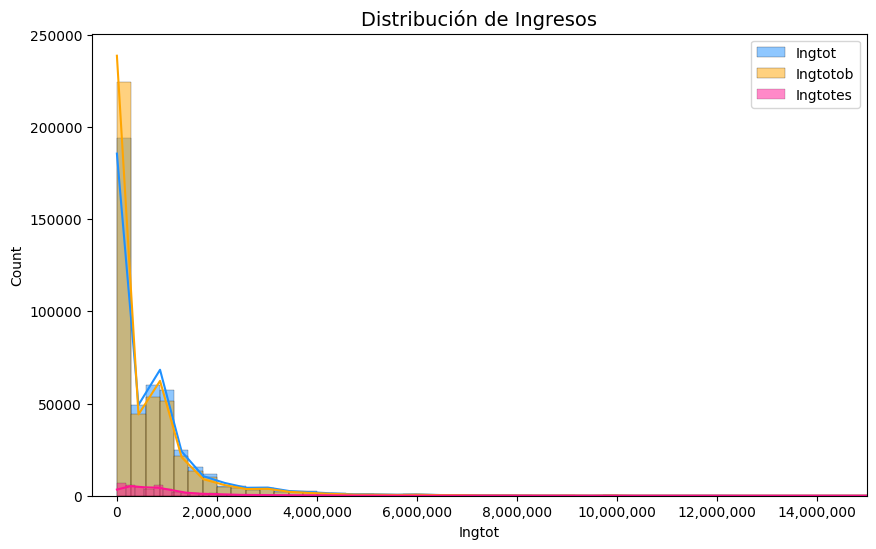

In [23]:
import matplotlib.ticker as ticker

# Crear el gráfico de distribución
plt.subplots(figsize=(10,6), dpi=100)

# Mostrar la frecuencia observada para cada variable de ingreso
sns.histplot(df.loc[df['Ingtot'].notna(), 'Ingtot'], kde=True, color="dodgerblue", label="Ingtot", stat="count", bins=300)
sns.histplot(df.loc[df['Ingtotob'].notna(), 'Ingtotob'], kde=True, color="orange", label="Ingtotob", stat="count", bins=300)
sns.histplot(df.loc[df['Ingtotes'].notna(), 'Ingtotes'], kde=True, color="deeppink", label="Ingtotes", stat="count", bins=300)

# Título y leyenda
plt.title('Distribución de Ingresos', fontsize=14)
plt.legend()
# Restringir el rango del eje X
plt.xlim(-500000, 15000000)
# Formatear el eje X con separador de miles y sin decimales
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f"{x:,.0f}"))

plt.show()

**Concluyendo: Se utilizará Ingtot**

## Drop Columns

Aquellas columnas presentes en Train pero no en Test, deben ser eliminadas. Pues a la hora de poner el modelo en producción, debe proyectar apenas con aquellas variables que tenga disponibles. Este análisis no aplica, obviamente, a la target de Ingreso Total.

In [24]:
# Columnas a dropear: aquellas que están en train_personas pero no en test_personas, excluyendo la columna 'Ingtot'
columns_to_drop = only_in_train.copy()

# Eliminar la columna 'Ingtot' de la lista de columnas a dropear
columns_to_drop = [col for col in columns_to_drop if col != 'Ingtot']

# Dropear las columnas en el DataFrame de df
df = df.drop(columns=columns_to_drop)

# Verificar el resultado
print(df.columns)

Index(['id', 'Orden', 'Clase', 'Dominio', 'P6020', 'P6040', 'P6050', 'P6090',
       'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430',
       'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4',
       'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3',
       'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045',
       'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350',
       'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1',
       'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet', 'Oc',
       'Des', 'Ina', 'Ingtot', 'Depto'],
      dtype='object')


In [25]:
# 'Dominio', mismo tratamiento que en hogares
# usar "Depto" como geográfica.
# Eliminar la columna 
df = df.drop(columns=['Dominio'], errors='ignore')

In [26]:
test_personas.columns

Index(['id', 'Orden', 'Clase', 'Dominio', 'P6020', 'P6040', 'P6050', 'P6090',
       'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430',
       'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4',
       'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3',
       'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045',
       'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350',
       'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1',
       'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet', 'Oc',
       'Des', 'Ina', 'Depto'],
      dtype='object')

## Missing Values

### Detección de Valores Faltantes

<Axes: >

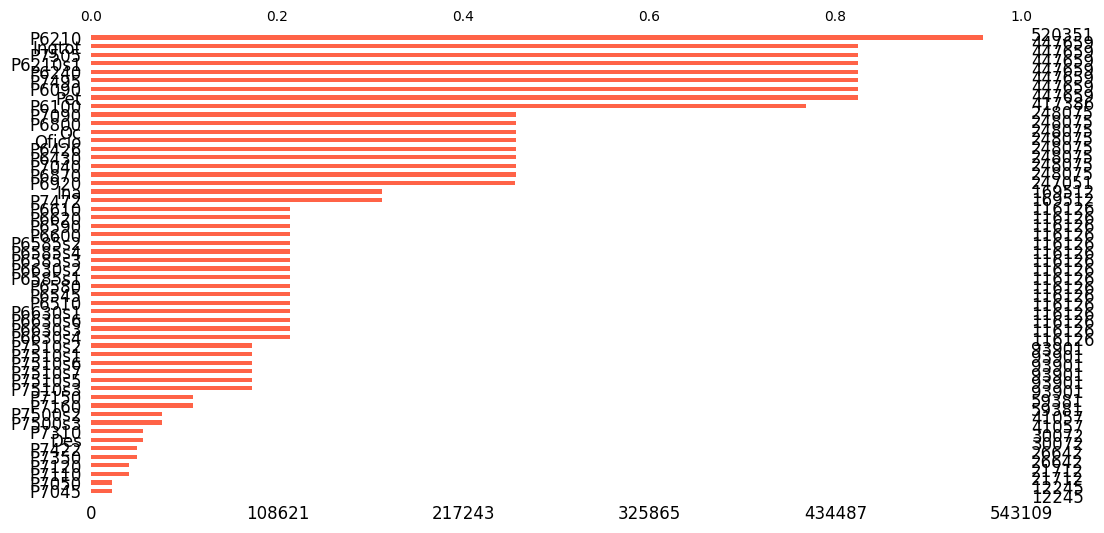

In [27]:
# Filtrar columnas con missing values
missing_columns = df.columns[df.isnull().any()]

# Graficar solo las columnas con missing values
msno.bar(df[missing_columns], figsize=(12, 6), sort="ascending", fontsize=12, color='tomato')

In [28]:
# Obtener nombres de columnas con valores faltantes
columnas_con_missing = df.columns[df.isnull().any()].tolist()
print("Columnas con valores faltantes:", columnas_con_missing)

Columnas con valores faltantes: ['P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'Oficio', 'P6426', 'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6', 'P6800', 'P6870', 'P6920', 'P7040', 'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Pet', 'Oc', 'Des', 'Ina', 'Ingtot']


In [29]:
# Calcular porcentaje de valores faltantes
tabla_missing = df.isnull().mean() * 100

# Filtrar solo las columnas con valores faltantes
tabla_missing = tabla_missing[tabla_missing > 0].sort_values(ascending=False)

# Convertir a DataFrame para una visualización más clara
tabla_missing_df = tabla_missing.reset_index()
tabla_missing_df.columns = ['Columna', 'Porcentaje de Missing Values']
print(tabla_missing_df)

    Columna  Porcentaje de Missing Values
0     P7045                            98
1     P7050                            98
2     P7110                            96
3     P7120                            96
4     P7350                            95
5     P7422                            95
6       Des                            94
7     P7310                            94
8   P7500s3                            92
9   P7500s2                            92
10    P7150                            89
11    P7160                            89
12  P7510s6                            83
13  P7510s5                            83
14  P7510s7                            83
15  P7510s1                            83
16  P7510s2                            83
17  P7510s3                            83
18  P6630s3                            79
19  P6630s4                            79
20  P6630s6                            79
21  P6630s2                            79
22    P6590                       

In [30]:
# Identificar columnas con más del 70% de valores faltantes
columnas_mas_de_70_missing = df.columns[df.isnull().mean() > 0.7].tolist()

print("Columnas con más del 70% de valores faltantes:", columnas_mas_de_70_missing)

Columnas con más del 70% de valores faltantes: ['P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6', 'P7045', 'P7050', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350', 'P7422', 'P7500s2', 'P7500s3', 'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', 'Des']


### Dropeo Variables con muchos Missings

In [31]:
# Columnas a eliminar, por tener muchos missings.
# en string, para que quede fijo.
personas_columns_to_drop = ['P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6', 'P7045', 'P7050', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350', 'P7422', 'P7500s2', 'P7500s3', 'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7']

# 'P6430' tiene 55%, pero es una extension de Oficio...
# 'Des' Desempleado, no se dropea

In [32]:
df = df.drop(columns=personas_columns_to_drop, errors='ignore')

In [33]:
# Calcular porcentaje de valores faltantes
tabla_missing = df.isnull().mean() * 100

# Filtrar solo las columnas con valores faltantes
tabla_missing = tabla_missing[tabla_missing > 0].sort_values(ascending=False)

# Convertir a DataFrame para una visualización más clara
tabla_missing_df = tabla_missing.reset_index()
tabla_missing_df.columns = ['Columna', 'Porcentaje de Missing Values']
print(tabla_missing_df)

    Columna  Porcentaje de Missing Values
0       Des                            94
1       Ina                            69
2     P7472                            69
3     P6920                            55
4     P7040                            54
5        Oc                            54
6    Oficio                            54
7     P6426                            54
8     P6800                            54
9     P6870                            54
10    P7090                            54
11    P6100                            23
12    P7505                            18
13      Pet                            18
14    P6090                            18
15    P7495                            18
16    P6240                            18
17  P6210s1                            18
18   Ingtot                            18
19    P6210                             4


### Imputación de Missing Values

#### Variables Laborales

In [34]:
# Seleccionar las columnas categóricas
columnas_categoricas = ['Pet', 'Oc', 'Des', 'Ina', 'Oficio']

# Verificar que las columnas existan en el DataFrame
columnas_existentes = [col for col in columnas_categoricas if col in df.columns]

# Obtener los valores únicos de cada columna categórica
valores_unicos = {col: df[col].dropna().unique().tolist() for col in columnas_existentes}

# Mostrar los valores únicos para cada columna
for columna, valores in valores_unicos.items():
    print(f"Columna '{columna}':")
    print(f"Valores únicos: {valores}")
    print("-" * 40)

Columna 'Pet':
Valores únicos: [1.0]
----------------------------------------
Columna 'Oc':
Valores únicos: [1.0]
----------------------------------------
Columna 'Des':
Valores únicos: [1.0]
----------------------------------------
Columna 'Ina':
Valores únicos: [1.0]
----------------------------------------
Columna 'Oficio':
Valores únicos: [53.0, 39.0, 95.0, 51.0, 45.0, 98.0, 97.0, 77.0, 13.0, 32.0, 8.0, 3.0, 38.0, 59.0, 55.0, 2.0, 37.0, 54.0, 41.0, 79.0, 19.0, 11.0, 84.0, 21.0, 33.0, 99.0, 6.0, 58.0, 1.0, 12.0, 75.0, 42.0, 83.0, 57.0, 44.0, 85.0, 94.0, 15.0, 30.0, 91.0, 87.0, 70.0, 74.0, 16.0, 56.0, 7.0, 17.0, 9.0, 93.0, 81.0, 82.0, 80.0, 61.0, 18.0, 92.0, 90.0, 89.0, 36.0, 5.0, 64.0, 4.0, 49.0, 34.0, 62.0, 14.0, 86.0, 50.0, 31.0, 40.0, 35.0, 96.0, 63.0, 60.0, 73.0, 20.0, 43.0, 88.0, 71.0, 78.0, 52.0, 72.0, 0.0, 76.0]
----------------------------------------


In [35]:
# Para continuar con la lógica del dataset, el booleano False le asignan valor 2
# Variables a rellenar con el número 2 (No)
# Población en edad de trabajar, Ocupado, Descoupado, Inactivo. Porque es un booleano que completaron solo con 1.
variables_fill_2 = ['Pet', 'Oc', 'Des', 'Ina']
df[variables_fill_2] = df[variables_fill_2].fillna(2)

In [36]:
# La columna 'Oficio' tiene más del 50% de valores faltantes, 
# Está codificada, y no se encontró info adicional en el sitio web.
# Se procede a imputar con la moda (valor más frecuente).
df['Oficio'].fillna(df['Oficio'].mode()[0], inplace=True)

In [38]:
# Personas NO Ocupadas, llevará trabajando 0 meses
# Rellenar 'P6800' con 0 donde 'Oc' es diferente de 1
df.loc[df['Oc'] != 1, 'P6800'] = df.loc[df['Oc'] != 1, 'P6800'].fillna(0)

In [39]:
# Personas NO Ocupadas, trabajarán 0 horas.
# Advertencia, por default se asigna 000 si lleva menos de un mes trabajando. 
# rellenar missings con 0 podría llevar a confusión de 0 no trabaja, con 000 recién empieza. (punto a mejorar)
# Rellenar 'P6426' con 0 donde 'Oc' es diferente de 1
df.loc[df['Oc'] != 1, 'P6426'] = df.loc[df['Oc'] != 1, 'P6426'].fillna(0)

In [40]:
# Personas NO Ocupadas, no tendrán compañeros de trabajo.
# Crear categoría 0
# Rellenar 'P6870' con 0 donde 'Oc' es diferente de 1
df.loc[df['Oc'] != 1, 'P6870'] = df.loc[df['Oc'] != 1, 'P6870'].fillna(0)

In [41]:

# # Calcular la cantidad de missings después del relleno
# missing_values_P6426 = df['P6426'].isnull().sum()

# # Calcular el porcentaje de missings después del relleno
# missing_percentage_P6426 = (missing_values_P6426 / len(df)) * 100

# # Mostrar la cantidad y porcentaje de valores faltantes para 'P6426'
# print(f"Cantidad de missings en 'P6426' después del relleno: {missing_values_P6426}")
# print(f"Porcentaje de missings en 'P6426' después del relleno: {missing_percentage_P6426:.2f}%")


In [42]:
# Meses trabajando en empresa
# rellenar con 999 (no sabe el número de meses que lleva trabajando)
df['P6426'] = df['P6426'].fillna(999)

#### Variables Educativas

In [43]:
# Seleccionar las columnas categóricas
columnas_categoricas = ['P6210', 'P6210s1']
# Crear tablas detalladas para cada columna categórica
for col in columnas_categoricas:
    print("-" * 50)
    print(f"Variable '{col}':")
    
    # Calcular la frecuencia de valores únicos
    value_counts = df[col].value_counts(dropna=False)  # Incluye NaN
    total_count = len(df[col])  # Total de filas para la columna
    
    # Crear un DataFrame para mostrar resultados
    tabla_frecuencia = pd.DataFrame({
        'Value': value_counts.index,
        'n° Obs': value_counts.values,
        '%': (value_counts.values / total_count * 100).round(2)
    })
    print(tabla_frecuencia)

--------------------------------------------------
Variable 'P6210':
   Value  n° Obs  %
0      3  134916 25
1      6  127741 24
2      5  120145 22
3      4   94370 17
4      1   27814  5
5    NaN   22758  4
6      2   15307  3
7      9      58  0
--------------------------------------------------
Variable 'P6210s1':
    Value  n° Obs  %
0      11  106821 20
1     NaN   95450 18
2       5   81223 15
3       2   41169  8
4       3   35227  6
5       0   31032  6
6       7   28848  5
7       6   26669  5
8       8   23345  4
9       9   21706  4
10      4   20496  4
11      1   16379  3
12     10   13671  3
13     13     501  0
14     12     327  0
15     15     132  0
16     99      58  0
17     14      55  0


In [44]:
# Rellenar 'P6210' con 9 (no sabe, no informa)
df['P6210'] = df['P6210'].fillna(9)

# Rellenar 'P6210s1' con 99 (no sabe, no informa)
df['P6210s1'] = df['P6210s1'].fillna(99)
# Revisar, porque creo que pertenece a personas en edad escolar!!! (18%) Pet !=2
# se podría asignar por edad, bajo la hipótesis de que no ha reprobado.

#### Variables Restantes

In [45]:
# Seleccionar las columnas categóricas
columnas_categoricas = ['P7472', 'P6920', 'P6430', 'P6870', 'P7040', 
                        'P7090', 'P6100', 'P7505', 'P6090', 
                        'P7495', 'P6240']

# Verificar que las columnas existan en el DataFrame
columnas_existentes = [col for col in columnas_categoricas if col in df.columns]

# Crear tablas detalladas para cada columna categórica
for col in columnas_existentes:
    print("-" * 50)
    print(f"Variable '{col}':")
    
    # Calcular la frecuencia de valores únicos
    value_counts = df[col].value_counts(dropna=False)  # Incluye NaN
    total_count = len(df[col])  # Total de filas para la columna
    
    # Crear un DataFrame para mostrar resultados
    tabla_frecuencia = pd.DataFrame({
        'Value': value_counts.index,
        'n° Obs': value_counts.values,
        '%': (value_counts.values / total_count * 100).round(2)
    })
    print(tabla_frecuencia)

--------------------------------------------------
Variable 'P7472':
   Value  n° Obs  %
0    NaN  373597 69
1      2  167572 31
2      1    1940  0
--------------------------------------------------
Variable 'P6920':
   Value  n° Obs  %
0    NaN  296058 55
1      2  147466 27
2      1   95045 18
3      3    4540  1
--------------------------------------------------
Variable 'P6870':
   Value  n° Obs  %
0      0  295034 54
1      1   95974 18
2      9   59061 11
3      2   39974  7
4      3   15519  3
5      4   12437  2
6      5    7740  1
7      6    6681  1
8      7    5398  1
9      8    5291  1
--------------------------------------------------
Variable 'P7040':
   Value  n° Obs  %
0    NaN  295034 54
1      2  235830 43
2      1   12245  2
--------------------------------------------------
Variable 'P7090':
   Value  n° Obs  %
0    NaN  295034 54
1      2  226363 42
2      1   21712  4
--------------------------------------------------
Variable 'P6100':
   Value  n° Obs  %
0     

In [46]:
# Variables a rellenar con el número 2 (No)
variables_fill_2 = ['P7472', 'P6920', 'P7040', 'P7090']
df[variables_fill_2] = df[variables_fill_2].fillna(2)

# Variables a rellenar con el número 9 (No sabe, no informa)
variables_fill_9 = ['P6100', 'P6090']
df[variables_fill_9] = df[variables_fill_9].fillna(9)

In [47]:
# Verificar qué columnas tienen valores faltantes
missing_columns = df.columns[df.isnull().any()]

# Mostrar las columnas con missings y la cantidad de missings por columna
missing_summary = df[missing_columns].isnull().sum()
# Calcular el porcentaje de missings por columna
missing_percentage = (missing_summary / len(df)) * 100
# Crear un DataFrame con el resumen de missings
missing_report = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage (%)': missing_percentage.round(2)
})
# Calcular los missings para menores de edad (Pet == 2) y adultos (Pet != 2)
# Infantes (menores de edad)
missing_infantes_percentage = (df[df['Pet'] == 2][missing_columns].isnull().sum() / len(df[df['Pet'] == 2])) * 100
# Adultos
missing_adultos_percentage = (df[df['Pet'] != 2][missing_columns].isnull().sum() / len(df[df['Pet'] != 2])) * 100
# Agregar las columnas "Infantes (%)" y "Adultos (%)" al reporte de missings
missing_report['Infantes (%)'] = missing_infantes_percentage.round(2)
missing_report['Adultos (%)'] = missing_adultos_percentage.round(2)

# Mostrar el reporte final
print(missing_report)

        Missing Count  Missing Percentage (%)  Infantes (%)  Adultos (%)
P6240           95450                      18           100            0
P7495           95450                      18           100            0
P7505           95450                      18           100            0
Ingtot          95450                      18           100            0


In [48]:
# P6240 con 0
df['P6240'].fillna(0, inplace=True)

# P7495 con 2
df['P7495'].fillna(2, inplace=True)

# P7505 con 2
df['P7505'].fillna(2, inplace=True)

# Ingtot con 0
df['Ingtot'].fillna(0, inplace=True)

In [49]:
"""
# Lista de columnas para imputar con K-NN
variables_knn = ['P7505', 'P7495', 'P6240']

# Seleccionar solo las columnas relevantes para la imputación
df_knn = df[variables_knn]

# Inicializar el imputador con K=5 (se puede ajustar el número de vecinos)
knn_imputer = KNNImputer(n_neighbors=5)

# Aplicar la imputación K-NN
df_imputed = knn_imputer.fit_transform(df_knn)

# Reemplazar las columnas originales con las imputadas
df[variables_knn] = df_imputed
"""

"\n# Lista de columnas para imputar con K-NN\nvariables_knn = ['P7505', 'P7495', 'P6240']\n\n# Seleccionar solo las columnas relevantes para la imputación\ndf_knn = df[variables_knn]\n\n# Inicializar el imputador con K=5 (se puede ajustar el número de vecinos)\nknn_imputer = KNNImputer(n_neighbors=5)\n\n# Aplicar la imputación K-NN\ndf_imputed = knn_imputer.fit_transform(df_knn)\n\n# Reemplazar las columnas originales con las imputadas\ndf[variables_knn] = df_imputed\n"

In [50]:
missing_after_fill = df.isnull().sum()

# Mostrar la cantidad de missings después del relleno
print(missing_after_fill)

id         0
Orden      0
Clase      0
P6020      0
P6040      0
P6050      0
P6090      0
P6100      0
P6210      0
P6210s1    0
P6240      0
Oficio     0
P6426      0
P6800      0
P6870      0
P6920      0
P7040      0
P7090      0
P7472      0
P7495      0
P7505      0
Pet        0
Oc         0
Des        0
Ina        0
Ingtot     0
Depto      0
dtype: int64


## Interacciones entre Variables

En la literatura económica relacionada con la educación y economía laboral, se reconoce que el nivel de ingresos está influido por una variedad de factores individuales y culturales. Las interacciones entre estas variables permiten capturar dinámicas complejas que no se observan directamente al analizar cada factor por searado.

In [51]:
# Interacción: Edad y Edad al Cuadrado (P6040 y P6040²)
df['P6040_squared'] = df['P6040'] ** 2  # Edad al Cuadrado

In [52]:
# Diccionarios de mapeo para cada variable
gender_map = {1: 'hombre', 2: 'mujer'}
class_map = {1: 'urbano', 2: 'rural'}
education_map = {3: 'primaria', 6: 'universitaria', 5: 'media', 4: 'secundaria', 
                 1: 'ninguna', 2: 'preescolar', 9: 'noinfo'}

# Reemplazar los valores en el DataFrame original para las columnas mapeadas
df['P6020_mapped'] = df['P6020'].replace(gender_map)
df['Clase_mapped'] = df['Clase'].replace(class_map)
df['P6210_mapped'] = df['P6210'].replace(education_map)

# Interacción: Género × Nivel Educativo (P6020 × P6210)
df['P6020_P6210_interaction'] = df['P6020_mapped'] + "_" + df['P6210_mapped']  # Género x Nivel Educativo
# Interacción: Zona Urbana/Rural × Nivel Educativo (Clase × P6210)
df['Clase_P6210_interaction'] = df['Clase_mapped'] + "_" + df['P6210_mapped']  # Zona Urbana/Rural x Nivel Educativo

# Eliminar las columnas auxiliares para no mantenerlas en el DataFrame final
df.drop(columns=['P6020_mapped', 'Clase_mapped', 'P6210_mapped'], inplace=True)

In [53]:
# Verificar las primeras filas del DataFrame con las interacciones
print(df[['P6020_P6210_interaction', 'Clase_P6210_interaction']].head())

  P6020_P6210_interaction Clase_P6210_interaction
0          mujer_primaria         urbano_primaria
1       hombre_preescolar       urbano_preescolar
2            hombre_media            urbano_media
3       hombre_preescolar       urbano_preescolar
4       hombre_secundaria       urbano_secundaria


In [54]:
# 2. Aplicar One-Hot Encoding a las interacciones categóricas
categorical_interactions = ['P6020_P6210_interaction', 'Clase_P6210_interaction']
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Codificar las interacciones categóricas
for interaction in categorical_interactions:
    encoded = encoder.fit_transform(df[[interaction]])
    encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([interaction]))
    df = pd.concat([df, encoded_df], axis=1)
# Eliminar las columnas originales de las interacciones categóricas
df.drop(columns=categorical_interactions, inplace=True)

In [55]:
selected_columns = ['P6020', 'Clase'] + [col for col in df.columns if '_interaction' in col]
df[selected_columns].head()

,P6020,Clase,P6020_P6210_interaction_hombre_ninguna,P6020_P6210_interaction_hombre_noinfo,P6020_P6210_interaction_hombre_preescolar,P6020_P6210_interaction_hombre_primaria,P6020_P6210_interaction_hombre_secundaria,P6020_P6210_interaction_hombre_universitaria,P6020_P6210_interaction_mujer_media,P6020_P6210_interaction_mujer_ninguna,...,Clase_P6210_interaction_rural_primaria,Clase_P6210_interaction_rural_secundaria,Clase_P6210_interaction_rural_universitaria,Clase_P6210_interaction_urbano_media,Clase_P6210_interaction_urbano_ninguna,Clase_P6210_interaction_urbano_noinfo,Clase_P6210_interaction_urbano_preescolar,Clase_P6210_interaction_urbano_primaria,Clase_P6210_interaction_urbano_secundaria,Clase_P6210_interaction_urbano_universitaria
0,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [56]:
# 3. Escalar las interacciones numéricas
scaler = StandardScaler()
# Escalar la interacción de Edad al Cuadrado
df['P6040_squared_scaled'] = scaler.fit_transform(df[['P6040_squared']])

df.drop(columns='P6040_squared', inplace=True)

## Encoding

### Revisitando tipo de variables

Para clasificarlas y darles tratamiento adecuado (Encoding categóricas/Scaling numéricas)

In [57]:
# Inicializar listas para las variables
numerical_variables = []
categorical_variables = []
boolean_variables = []

# Recorrer todas las columnas del DataFrame (excepto 'id')
for column in df.columns:
    if column not in ['id', 'Orden', 'Ingtot']:  # Ignorar las columnas 'id' y 'Orden'
        unique_values = df[column].nunique()
        
        # Clasificar como variable booleana si tiene 3 o menos valores únicos
        if unique_values <= 3:
            boolean_variables.append(column)
        # Clasificar como variable numérica si tiene más de 20 valores únicos
        elif unique_values > 20:
            numerical_variables.append(column)
        # Clasificar como variable categórica si tiene 20 o menos valores únicos
        else:
            categorical_variables.append(column)

# Mostrar las variables clasificadas
print("Variables booleanas:", boolean_variables)
print("Variables numéricas:", numerical_variables)
print("Variables categóricas:", categorical_variables)


Variables booleanas: ['Clase', 'P6020', 'P6090', 'P6920', 'P7040', 'P7090', 'P7472', 'P7495', 'P7505', 'Pet', 'Oc', 'Des', 'Ina', 'P6020_P6210_interaction_hombre_ninguna', 'P6020_P6210_interaction_hombre_noinfo', 'P6020_P6210_interaction_hombre_preescolar', 'P6020_P6210_interaction_hombre_primaria', 'P6020_P6210_interaction_hombre_secundaria', 'P6020_P6210_interaction_hombre_universitaria', 'P6020_P6210_interaction_mujer_media', 'P6020_P6210_interaction_mujer_ninguna', 'P6020_P6210_interaction_mujer_noinfo', 'P6020_P6210_interaction_mujer_preescolar', 'P6020_P6210_interaction_mujer_primaria', 'P6020_P6210_interaction_mujer_secundaria', 'P6020_P6210_interaction_mujer_universitaria', 'Clase_P6210_interaction_rural_ninguna', 'Clase_P6210_interaction_rural_noinfo', 'Clase_P6210_interaction_rural_preescolar', 'Clase_P6210_interaction_rural_primaria', 'Clase_P6210_interaction_rural_secundaria', 'Clase_P6210_interaction_rural_universitaria', 'Clase_P6210_interaction_urbano_media', 'Clase_P621

### Variables Booleanas

In [58]:
# Cambiar el nombre de la variable "Clase" a "cabecera"
df['cabecera'] = df['Clase'].map({1: True, 2: False})
# Eliminar la columna original 'Clase' si ya no es necesaria
df = df.drop('Clase', axis=1)

In [59]:
# Booleanas a mapear
boolean_variables = ['P6020', 'P7040', 'P7090', 'P7472', 'P7495', 'P7505', 'Pet', 'Oc', 'Des', 'Ina']

# Mapear las booleanas
for var in boolean_variables:
    df[var] = df[var].map({1: True, 2: False})

In [60]:
# casi booleanas
# P6090 (afiliacion a seguridad social 9: No sabe, no informa)
# P6920 (3: Pensionado)

# Variables categóricas a codificar con One-Hot Encoding
one_hot_variables = ['P6090', 'P6920']
# Aplicar One-Hot Encoding a las variables seleccionadas
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Crear un DataFrame con los resultados del encoding
encoded_data = pd.DataFrame(
    encoder.fit_transform(df[one_hot_variables]),
    columns=encoder.get_feature_names_out(one_hot_variables),
    index=df.index
)

# Concatenar los datos codificados con el DataFrame original
df = pd.concat([df.drop(columns=one_hot_variables), encoded_data], axis=1)

# Eliminar las columnas correspondientes a las categorías específicas
df = df.drop(columns=[col for col in df.columns if 'P6090_2.0' in col], axis=1)
df = df.drop(columns=[col for col in df.columns if 'P6920_2.0' in col], axis=1)

### Variables Categóricas

En términos generales, se aplicará:
* One-Hot Encoding: a variables categóricas, no ordinales.
* Label Encoding: a variables ordinales.

In [61]:
# Verificar que las columnas existan en el DataFrame
columnas_existentes = [col for col in categorical_variables if col in df.columns]

# Crear tablas detalladas para cada columna categórica
for col in columnas_existentes:
    print("-" * 50)
    print(f"Variable '{col}':")
    
    # Calcular la frecuencia de valores únicos
    value_counts = df[col].value_counts(dropna=False)  # Incluye NaN
    total_count = len(df[col])  # Total de filas para la columna
    
    # Crear un DataFrame para mostrar resultados
    tabla_frecuencia = pd.DataFrame({
        'Value': value_counts.index,
        'n° Obs': value_counts.values,
        '%': (value_counts.values / total_count * 100).round(2)
    })
    print(tabla_frecuencia)


--------------------------------------------------
Variable 'P6050':
   Value  n° Obs  %
0      3  191912 35
1      1  164960 30
2      2   88328 16
3      5   44823  8
4      4   41160  8
5      9    9815  2
6      6    1454  0
7      7     468  0
8      8     189  0
--------------------------------------------------
Variable 'P6100':
   Value  n° Obs  %
0      1  199157 37
1      3  198253 36
2      9  125871 23
3      2   19828  4
--------------------------------------------------
Variable 'P6210':
   Value  n° Obs  %
0      3  134916 25
1      6  127741 24
2      5  120145 22
3      4   94370 17
4      1   27814  5
5      9   22816  4
6      2   15307  3
--------------------------------------------------
Variable 'P6210s1':
    Value  n° Obs  %
0      11  106821 20
1      99   95508 18
2       5   81223 15
3       2   41169  8
4       3   35227  6
5       0   31032  6
6       7   28848  5
7       6   26669  5
8       8   23345  4
9       9   21706  4
10      4   20496  4
11      1 

#### One-Hot Encoding:

- Se utiliza para variables categóricas no ordinales o cuando las categorías no tienen un orden lógico.
- Ideal para variables categóricas con un número pequeño o moderado de categorías.
- Crea una columna para cada categoría única, asignando 1 a la categoría presente y 0 al resto.
- Aumenta el número de columnas en el dataset, proporcional al número de categorías únicas.
- Elimina relaciones espurias entre categorías, siendo más adecuado para algoritmos que no son sensibles a las relaciones ordinales. (Adecuado para Arboles de Decisión.)

categorica sin orden
P6240 #actividad que realizó la semana pasada. 6 cats.
P6100 # Regimen Seguridad Social.4 cats

P6050 # parentesco con jefe de hogar. Creo que no justifica crear tantas nuevas columnas.

In [62]:
# Inicializar OneHotEncoder sin drop para controlar la eliminación manualmente
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Codificar P6240 (6 categorías) ¿En que actividad ocupó...... la mayor parte del tiempo la semana pasada?
P6240_encoded = encoder.fit_transform(df[['P6240']])
P6240_encoded_df = pd.DataFrame(P6240_encoded, columns=encoder.get_feature_names_out(['P6240']))

# Codificar P6100 (4 categorías) Regímenes de seguridad social
P6100_encoded = encoder.fit_transform(df[['P6100']])
P6100_encoded_df = pd.DataFrame(P6100_encoded, columns=encoder.get_feature_names_out(['P6100']))

# Concatenar los DataFrames de las columnas originales con las columnas codificadas
df = pd.concat([df, P6240_encoded_df, P6100_encoded_df], axis=1)

# Eliminar manualmente las columnas generadas que no se necesitan (pen grl, la categoría de referencia)
df = df.drop(columns=['P6240_2.0', 'P6100_2.0'], axis=1)

# Verificar las primeras filas del DataFrame resultante
print(df.head())

                         id  Orden  P6020  P6040  P6050  P6100  P6210  \
0  8d0193e328305a042001a35f      2  False     38      2      1      3   
1  8d0193e328305a042001a35f      5   True      3      3      9      2   
2  8d0193e328305a042001a35f      1   True     41      1      1      5   
3  8d0193e328305a042001a35f      4   True      3      3      9      2   
4  8d0193e328305a042001a35f      3   True     11      3      9      4   

   P6210s1  P6240  Oficio  ...  P6920_3.0  P6240_0.0  P6240_1.0  P6240_3.0  \
0        3      1      53  ...          0          0          1          0   
1       99      0      45  ...          0          1          0          0   
2       11      6      39  ...          0          0          0          0   
3       99      0      45  ...          0          1          0          0   
4       99      0      45  ...          0          1          0          0   

   P6240_4.0  P6240_5.0  P6240_6.0  P6100_1.0  P6100_3.0  P6100_9.0  
0          0          

#### Label Encoding:

- Se aplica a variables categóricas ordinales, donde las categorías tienen un orden lógico.
- Asigna un número entero a cada categoría, preservando el orden natural.
- No crea nuevas columnas, reemplaza los valores originales por los números asignados.
- Es eficiente en términos de memoria, pero puede introducir sesgos en algoritmos sensibles a magnitudes numéricas (como Regresión Lineal).


In [63]:
# Inicializar LabelEncoder
le = LabelEncoder()

# P6870: Cantidad de personas trabajando en la empresa
# Se aplica Label Encoding sin cambiar el orden (1 a 9)
df['P6870'] = le.fit_transform(df['P6870'])

# Escolaridad
# P6210: Reordenar el 9 antes del 1
# Crear un diccionario de mapeo donde 9 se coloca antes de 1
map_p6210 = {1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 9: 1}  # Cambiar 9 a 1
df['P6210'] = df['P6210'].replace(map_p6210)
df['P6210'] = le.fit_transform(df['P6210'])

# P6210s1: Poner el 99 junto con el 0
# Reemplazamos 99 por 0 antes de aplicar Label Encoding
df['P6210s1'] = df['P6210s1'].replace(99, 0)
df['P6210s1'] = le.fit_transform(df['P6210s1'])

# Verificar las transformaciones
print(df[['P6870', 'P6210', 'P6210s1']].head())

   P6870  P6210  P6210s1
0      4      3        3
1      0      2        0
2      9      5       11
3      0      2        0
4      0      4        0


## Scaling

El scaling de las variables numéricas es un paso fundamental en el preprocesamiento de datos, especialmente cuando se utilizan algoritmos de Machine Learning que son sensibles a la magnitud de las variables. Por ejemplo, Regresión Lineal, Elastic Net, Regresión Lasso o Regresión Ridge. Cuando las variables tienen diferentes escalas, estos algoritmos pueden dar más peso a las características con un rango más grande, lo que puede afectar negativamente la precisión del modelo.

In [64]:
# Variables numéricas a escalar
numerical_variables = ['P6040', 'P6426', 'P6800', 'Oficio']

# 'P6040' edad, 'P6426' meses trabajados en la empresa, 'P6800' horas trabajadas por semana
# 'Oficio' categorica codificada, no le hago Encoding, porque van a quedar demasiadas categorías!

In [65]:
df[numerical_variables].describe()

,P6040,P6426,P6800,Oficio
count,"543,109","543,109","543,109","543,109"
mean,34,39,20,49
std,22,88,25,19
min,0,0,0,0
25%,16,0,0,45
50%,31,0,0,45
75%,50,30,48,51
max,110,948,130,99


In [66]:
# Función para graficar una variable seleccionada
def plot_scaling_comparisons_single_variable(data, column):
    original_data = data[[column]].values
    scaled_data_standard = StandardScaler().fit_transform(original_data)
    scaled_data_robust = RobustScaler().fit_transform(original_data)
    
    # Crear una figura para la variable
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    # Original data
    sns.histplot(original_data, ax=axes[0], color='Green', kde=True)
    axes[0].set_title(f"{column} - Original Data")
    
    # Standard Scaling
    sns.histplot(scaled_data_standard, ax=axes[1], kde=True)
    axes[1].set_title(f"{column} - Standard Scaled")
    
    # Robust Scaling
    sns.histplot(scaled_data_robust, ax=axes[2], kde=True)
    axes[2].set_title(f"{column} - Robust Scaled")
    
    # Ajustar espaciado
    plt.tight_layout()
    plt.show()

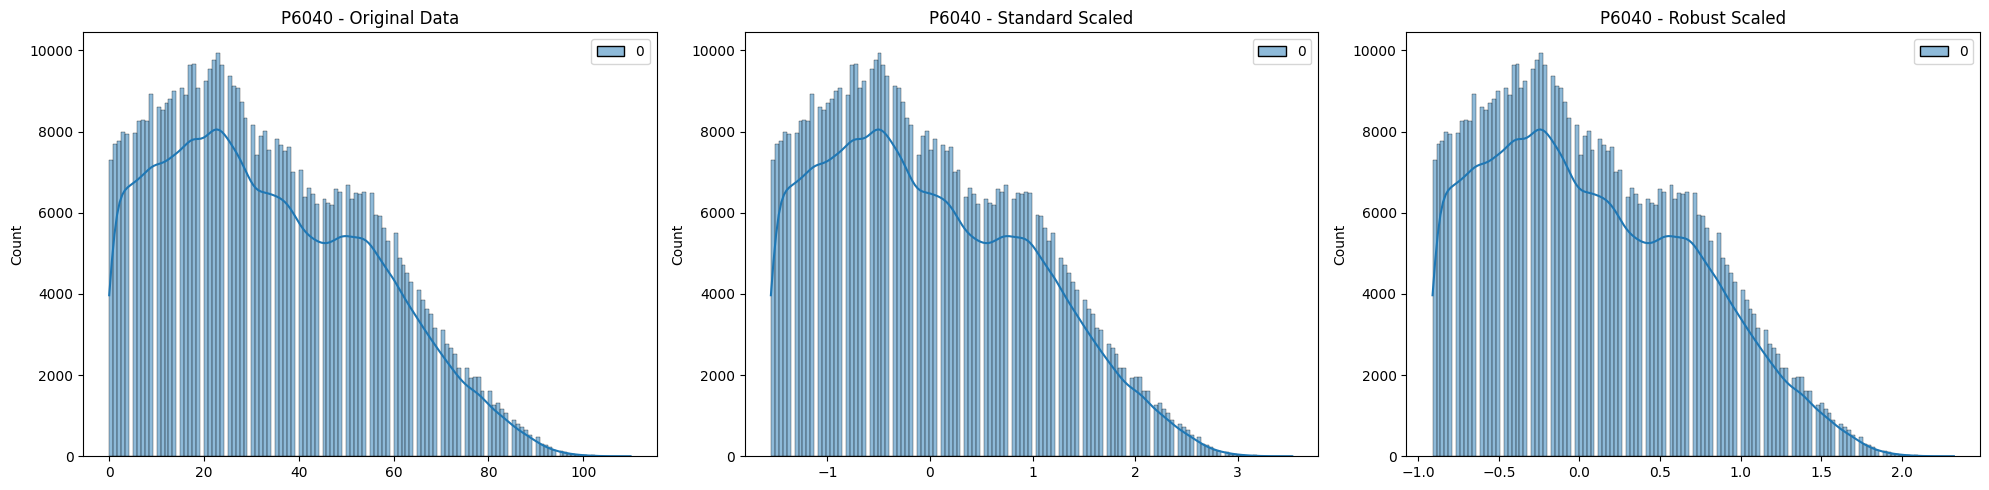

In [67]:
# Llamar a la función para graficar la variable seleccionada
plot_scaling_comparisons_single_variable(df, 'P6040')

In [68]:
# Inicializar el scaler
scaler = RobustScaler()
# Aplicar RobustScaler a las variables numéricas
df[numerical_variables] = scaler.fit_transform(df[numerical_variables])
# Verificar las primeras filas 
print(df[numerical_variables].head())

   P6040  P6426  P6800  Oficio
0      0      0      1       1
1     -1      0      0       0
2      0      8      1      -1
3     -1      0      0       0
4     -1      0      0       0


In [69]:
# Obtener el resumen estadístico de todo el DataFrame
summary = df.describe()

# Filtrar las columnas con los valores máximos más altos
top_10_columns = summary.loc['max'].nlargest(15).index

# Mostrar el resumen de las 10 columnas con los valores máximos
df[top_10_columns].describe()

,Ingtot,Depto,P6426,Orden,P6210s1,P6050,P6100,Oficio,P6870,P6040_squared_scaled,P6210,P6240,P6800,P6040,P6020_P6210_interaction_hombre_ninguna
count,"543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109","543,109"
mean,"638,624",37,1,3,5,3,4,1,2,-0,4,2,0,0,0
std,"1,281,718",24,3,2,4,2,3,3,3,1,2,2,1,1,0
min,0,5,0,1,0,1,1,-8,0,-1,0,0,0,-1,0
25%,0,15,0,1,1,1,1,0,0,-1,3,1,0,-0,0
50%,"180,000",27,0,2,5,3,3,0,0,-0,4,1,0,0,0
75%,"900,000",54,1,3,9,3,3,1,2,1,5,4,1,1,0
max,"85,833,333",76,32,28,15,9,9,9,9,6,6,6,3,2,1


## Replicar ETL para Test Set

In [70]:
df_test = test_personas

# Dropear variables con muchos missings
df_test = df_test.drop(columns=personas_columns_to_drop, errors='ignore')
# usar "Depto" como geográfica. dropear 'Dominio'
df_test = df_test.drop(columns=['Dominio'], errors='ignore')

## ---------------------------- ##
# Imputar Missing Values
## Variables varias
variables_fill_2 = ['Pet', 'Oc', 'Des', 'Ina']
df_test[variables_fill_2] = df_test[variables_fill_2].fillna(2)

## Variable Oficio
df_test['Oficio'].fillna(df_test['Oficio'].mode()[0], inplace=True)


# Rellenar 'P6800' con 0, Si no está Ocupado
df_test.loc[df_test['Oc'] != 1, 'P6800'] = df_test.loc[df_test['Oc'] != 1, 'P6800'].fillna(0)

# Rellenar 'P6426' con 0, Si no está Ocupado
df_test.loc[df_test['Oc'] != 1, 'P6426'] = df_test.loc[df_test['Oc'] != 1, 'P6426'].fillna(0)
# rellenar con 999 (no sabe el número de meses que lleva trabajando)
df_test['P6426'] = df_test['P6426'].fillna(999)

# Rellenar 'P6870' con 0, Si no está Ocupado
df_test.loc[df_test['Oc'] != 1, 'P6870'] = df_test.loc[df_test['Oc'] != 1, 'P6870'].fillna(0)

## Variables Educativas
# Rellenar 'P6210' con 9 (no sabe, no informa)
df_test['P6210'] = df_test['P6210'].fillna(9)
# Rellenar 'P6210s1' con 99 (no sabe, no informa)
df_test['P6210s1'] = df_test['P6210s1'].fillna(99)

## Variables Restantes
# Variables a rellenar con el número 2 (No)
variables_fill_2 = ['P7472', 'P6920', 'P7040', 'P7090']
df_test[variables_fill_2] = df_test[variables_fill_2].fillna(2)

# Variables a rellenar con el número 9 (No sabe, no informa)
variables_fill_9 = ['P6100', 'P6090']
df_test[variables_fill_9] = df_test[variables_fill_9].fillna(9)

# P6240 con 0
df_test['P6240'].fillna(0, inplace=True)

# P7495 con 2
df_test['P7495'].fillna(2, inplace=True)

# P7505 con 2
df_test['P7505'].fillna(2, inplace=True)

## ---------------------------- ##
# Interacciones entre Variables
# Interacción: Edad y Edad al Cuadrado (P6040 y P6040²)
df_test['P6040_squared'] = df_test['P6040'] ** 2  # Edad al Cuadrado

# Diccionarios de mapeo para cada variable
gender_map = {1: 'hombre', 2: 'mujer'}
class_map = {1: 'urbano', 2: 'rural'}
education_map = {3: 'primaria', 6: 'universitaria', 5: 'media', 4: 'secundaria', 
                 1: 'ninguna', 2: 'preescolar', 9: 'noinfo'}

# Reemplazar los valores en el DataFrame original para las columnas mapeadas
df_test['P6020_mapped'] = df_test['P6020'].replace(gender_map)
df_test['Clase_mapped'] = df_test['Clase'].replace(class_map)
df_test['P6210_mapped'] = df_test['P6210'].replace(education_map)

# Interacción: Género × Nivel Educativo (P6020 × P6210)
df_test['P6020_P6210_interaction'] = df_test['P6020_mapped'] + "_" + df_test['P6210_mapped']  # Género x Nivel Educativo
# Interacción: Zona Urbana/Rural × Nivel Educativo (Clase × P6210)
df_test['Clase_P6210_interaction'] = df_test['Clase_mapped'] + "_" + df_test['P6210_mapped']  # Zona Urbana/Rural x Nivel Educativo

# Eliminar las columnas auxiliares para no mantenerlas en el DataFrame final
df_test.drop(columns=['P6020_mapped', 'Clase_mapped', 'P6210_mapped'], inplace=True)

# 2. Aplicar One-Hot Encoding a las interacciones categóricas
categorical_interactions = ['P6020_P6210_interaction', 'Clase_P6210_interaction']
encoder = OneHotEncoder(drop='first', sparse_output=False)
# Codificar las interacciones categóricas
for interaction in categorical_interactions:
    encoded = encoder.fit_transform(df_test[[interaction]])
    encoded_df_test = pd.DataFrame(encoded, columns=encoder.get_feature_names_out([interaction]))
    df_test = pd.concat([df_test, encoded_df_test], axis=1)
# Eliminar las columnas originales de las interacciones categóricas
df_test.drop(columns=categorical_interactions, inplace=True)

# 3. Escalar las interacciones numéricas
scaler = StandardScaler()
# Escalar la interacción de Edad al Cuadrado
df_test['P6040_squared_scaled'] = scaler.fit_transform(df_test[['P6040_squared']])

df_test.drop(columns='P6040_squared', inplace=True)

## ---------------------------- ##
# Encoding

## Booleanas
# Cambiar el nombre de la variable "Clase" a "cabecera"
df_test['cabecera'] = df_test['Clase'].map({1: True, 2: False})
# Eliminar la columna original 'Clase' si ya no es necesaria
df_test = df_test.drop('Clase', axis=1)

# Booleanas a mapear
boolean_variables = ['P6020', 'P7040', 'P7090', 'P7472', 'P7495', 'P7505', 'Pet', 'Oc', 'Des', 'Ina']

# Mapear las booleanas
for var in boolean_variables:
    df_test[var] = df_test[var].map({1: True, 2: False})
    
# Variables categóricas a codificar con One-Hot Encoding
one_hot_variables = ['P6090', 'P6920']
# Aplicar One-Hot Encoding a las variables seleccionadas
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Crear un DataFrame con los resultados del encoding
encoded_data = pd.DataFrame(
    encoder.fit_transform(df_test[one_hot_variables]),
    columns=encoder.get_feature_names_out(one_hot_variables),
    index=df_test.index
)

# Concatenar los datos codificados con el DataFrame original
df_test = pd.concat([df_test.drop(columns=one_hot_variables), encoded_data], axis=1)

# Eliminar las columnas correspondientes a las categorías específicas
df_test = df_test.drop(columns=[col for col in df_test.columns if 'P6090_2.0' in col], axis=1)
df_test = df_test.drop(columns=[col for col in df_test.columns if 'P6920_2.0' in col], axis=1)

## Variables Categóricas
### One-Hot Encoding
# Inicializar OneHotEncoder sin drop para controlar la eliminación manualmente
encoder = OneHotEncoder(drop=None, sparse_output=False)

# Codificar P6240 (6 categorías) ¿En que actividad ocupó...... la mayor parte del tiempo la semana pasada?
P6240_encoded = encoder.fit_transform(df_test[['P6240']])
P6240_encoded_df_test = pd.DataFrame(P6240_encoded, columns=encoder.get_feature_names_out(['P6240']))

# Codificar P6100 (4 categorías) Regímenes de seguridad social
P6100_encoded = encoder.fit_transform(df_test[['P6100']])
P6100_encoded_df_test = pd.DataFrame(P6100_encoded, columns=encoder.get_feature_names_out(['P6100']))

# Concatenar los DataFrames de las columnas originales con las columnas codificadas
df_test = pd.concat([df_test, P6240_encoded_df_test, P6100_encoded_df_test], axis=1)

# Eliminar manualmente las columnas generadas que no se necesitan (pen grl, la categoría de referencia)
df_test = df_test.drop(columns=['P6240_2.0', 'P6100_2.0'], axis=1)

### Label Encoding
# Inicializar LabelEncoder
le = LabelEncoder()

# P6870: Cantidad de personas trabajando en la empresa
# Se aplica Label Encoding sin cambiar el orden (1 a 9)
df_test['P6870'] = le.fit_transform(df_test['P6870'])

# Escolaridad
# P6210: Reordenar el 9 antes del 1
# Crear un diccionario de mapeo donde 9 se coloca antes de 1
map_p6210 = {1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 9: 1}  # Cambiar 9 a 1
df_test['P6210'] = df_test['P6210'].replace(map_p6210)
df_test['P6210'] = le.fit_transform(df_test['P6210'])

# P6210s1: Poner el 99 junto con el 0
# Reemplazamos 99 por 0 antes de aplicar Label Encoding
df_test['P6210s1'] = df_test['P6210s1'].replace(99, 0)
df_test['P6210s1'] = le.fit_transform(df_test['P6210s1'])

## ---------------------------- ##
# Scaling
# Variables numéricas a escalar
numerical_variables = ['P6040', 'P6426', 'P6800', 'Oficio']
# Inicializar el scaler
scaler = RobustScaler()
# Aplicar RobustScaler a las variables numéricas
df_test[numerical_variables] = scaler.fit_transform(df_test[numerical_variables])

In [71]:
# Verificar columnas con valores faltantes en df_test
missing_values = df_test.isnull().sum()

# Filtrar columnas con valores faltantes
missing_cols = missing_values[missing_values > 0]

if not missing_cols.empty:
    print("Variables con valores faltantes en df_test:")
    print(missing_cols)
else:
    print("No hay valores faltantes en df_test.")

No hay valores faltantes en df_test.


## Identificadores

Resumiendo:

Se obtuvieron dos datasets:
* Train
* Test

In [72]:
# Separar características (X) y variable objetivo (y) en el dataset de entrenamiento
y_train = df['Ingtot']  # Variable objetivo
X_train = df.drop('Ingtot', axis=1)  # Variables predictoras
X_test = df_test

In [77]:
# Guardar el identificador de los hogares en el conjunto de prueba
test_ids = X_test[['id', 'Orden']]

# Eliminar 'id' de las características para que no interfiera en el modelo
X_train = X_train.drop(['id', 'Orden'], axis=1)
X_test = X_test.drop(['id', 'Orden'], axis=1)

## Lirear Regression

Modelo de Regresión Lineal simple usando los datos `X_train` y `y_train`. Posteriormente, predicciones sobre el conjunto de prueba `X_test`.

Este modelo servirá de *baseline*

In [79]:
# Fijar semilla para replicabilidad
# los modelos de regresión lineal de scikit-learn no tienen un componente aleatorio en su proceso de ajuste, por lo que no necesitas fijar la semilla directamente en el modelo. La semilla será relevante para el siguiente modelo.
SEED = 42
np.random.seed(SEED)

In [80]:
# 1. Instanciar el modelo
linear_model = LinearRegression()

# 2. Entrenar el modelo
linear_model.fit(X_train, y_train)

# 3. Predicciones en el conjunto de prueba
y_pred_linear = linear_model.predict(X_test)

# 4. Crear un DataFrame con las predicciones y los IDs
output_linear = pd.DataFrame({
    'id': test_ids['id'],       # Extraemos la columna 'id' de test_ids
    'Orden': test_ids['Orden'], # Añadimos la columna 'Orden' de test_ids
    'ingreso': y_pred_linear   # Añadimos las predicciones 'ingreso'
})

In [81]:
# Mostrar primeras filas del resultado
print(output_linear.head())

                         id  Orden   ingreso
0  3279230a4917cdf883df34cd      1 1,527,606
1  3279230a4917cdf883df34cd      3   -22,858
2  3279230a4917cdf883df34cd      2   375,670
3  3279230a4917cdf883df34cd      4    37,980
4  01bd1f72445acc719d19bd25      1 2,084,494


In [82]:
# Save results
output_csv_path = "stores/regression_linear.csv"
output_linear.to_csv(output_csv_path, index=False)
print(f"Archivo CSV guardado en: {output_csv_path}")

Archivo CSV guardado en: stores/regression_linear.csv


## Elastic Net

Modelo de Elastic Net, ajustando sus hiperparámetros con un grid search. Los parámetros que optimizaremos son:
* `alpha` (controla la penalización)
* `l1_ratio` (controla la mezcla entre L1 y L2)

In [83]:
# Definir el rango de hiperparámetros
param_grid = {
    'alpha': [0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]
}

# 1. Instanciar Elastic Net y GridSearchCV
elastic_net = ElasticNet(max_iter=10000, random_state=SEED)
grid_search = GridSearchCV(elastic_net, param_grid, scoring='neg_mean_squared_error', cv=5)

# 2. Entrenar el modelo
grid_search.fit(X_train, y_train)

# 3. Seleccionar el mejor modelo y hacer predicciones
best_elastic_net = grid_search.best_estimator_
y_pred_elasticnet = best_elastic_net.predict(X_test)

# 4. Crear un DataFrame con las predicciones y los IDs
output_elasticnet = pd.DataFrame({
    'id': test_ids['id'],       # Extraemos la columna 'id' de test_ids
    'Orden': test_ids['Orden'], # Añadimos la columna 'Orden' de test_ids
    'ingreso': y_pred_elasticnet   # Añadimos las predicciones 'ingreso'
})

In [84]:
# Mejores hiperparámetros y primeras filas del resultado
print("Mejores hiperparámetros:", grid_search.best_params_)
print(output_elasticnet.head())

Mejores hiperparámetros: {'alpha': 0.1, 'l1_ratio': 0.8}
                         id  Orden   ingreso
0  3279230a4917cdf883df34cd      1 1,427,870
1  3279230a4917cdf883df34cd      3   -26,151
2  3279230a4917cdf883df34cd      2   407,713
3  3279230a4917cdf883df34cd      4    45,268
4  01bd1f72445acc719d19bd25      1 2,041,481


In [91]:
# Save results
output_csv_path = "stores/regression_elasticnet.csv"
output_elasticnet.to_csv(output_csv_path, index=False)
print(f"Archivo CSV guardado en: {output_csv_path}")

Archivo CSV guardado en: stores/regression_elasticnet.csv


Los hiperparámetros del modelo **ElasticNet** son:

1. **`alpha`**: Parámetro de regularización que controla la magnitud de la penalización. El valor de `alpha` regula cuánto se penalizan los coeficientes del modelo. Un valor más grande implica una mayor regularización (más reducción en los coeficientes), mientras que un valor más pequeño implica menos regularización.

   - **En este caso, el valor de `alpha` es 0.1**. Comparado con el rango de valores en tu **`param_grid`** (`[0.1, 1, 10]`), el valor de `alpha` está en el extremo bajo de la escala. Este valor de 0.1 podría considerarse relativamente pequeño, lo que indica que el modelo no está siendo muy penalizado y permite que los coeficientes crezcan más. Podría estar buscando un equilibrio entre la regularización y la capacidad de ajuste del modelo.

    Es posible que el valor pequeño de alpha (en este caso, 0.1) sea una consecuencia de que se han eliminado muchas variables del modelo. Cuando se eliminan muchas variables, el modelo ya tiene menos parámetros que ajustar, lo que reduce la necesidad de una regularización fuerte. Esto puede llevar a que alpha se ajuste a un valor bajo para evitar una penalización excesiva sobre los coeficientes, ya que el modelo ya está más simplificado debido a la eliminación de características.

2. **`l1_ratio`**: Este hiperparámetro controla el balance entre Lasso (penalización L1) y Ridge (penalización L2). Un valor de `l1_ratio = 1` corresponde a una regularización completamente Lasso (solo L1), mientras que un valor de `l1_ratio = 0` corresponde a una regularización completamente Ridge (solo L2). Los valores intermedios permiten una mezcla de ambas.

   - **En este caso, el valor de `l1_ratio` es 0.8**. Este valor está bastante cerca de la regularización Lasso completa, pero sigue manteniendo un pequeño componente de Ridge. Comparado con el rango de valores en el **`param_grid`** (`[0.2, 0.5, 0.8]`), el valor de 0.8 es relativamente alto, lo que indica que el modelo está favoreciendo más la regularización Lasso, lo que podría ser útil ya que se espera que algunas características del modelo no tengan una relación lineal fuerte.

Resumiendo:
* `alpha` regula cuánto se aplica la penalización en general.
* `l1_ratio` regula cómo se aplica la penalización, dividiéndola entre Lasso y Ridge.

### Sugerencia para un nuevo `param_grid`:

Experimentar más con los valores de los hiperparámetros, probar ajustando los valores de `alpha` y `l1_ratio` de la siguiente manera:

- **Disminuir el valor de `alpha`** (por ejemplo, usando valores más pequeños como `0.01`, `0.05`, o incluso `0.001`) para reducir aún más la regularización y permitir que el modelo se ajuste más a los datos.
  
- **Aumentar el valor de `l1_ratio`** (por ejemplo, probando con valores como `0.9`, `0.95`, etc.) para darle más peso a la regularización Lasso, lo que puede ayudar en la selección de características, especialmente si se incorporan máss variables irrelevantes en el modelo.

Este enfoque permitirá evaluar si los resultados siguen mejorando al cambiar la regularización o si ya han convergido a un buen punto.

## Ingreso por Hogar

La variable `id` es el identificador del hogar. Por este motivo más de una persona puede tener el mismo identificador, por pertenecer al mismo hogar.

La variable `Orden` es el identificador de la persona dentro del hogar. 

In [94]:
# Verificar si la combinación de 'id' y 'Orden' tiene valores únicos
is_unique = output_linear[['id', 'Orden']].duplicated().sum() == 0

# Imprimir el resultado
if is_unique:
    print("La combinación de 'id' y 'Orden' tiene valores únicos.")
else:
    print("La combinación de 'id' y 'Orden' no tiene valores únicos.")

La combinación de 'id' y 'Orden' tiene valores únicos.


### Read dataset hogares

In [95]:
test_hogares = pd.read_csv("stores/test_hogares.csv")
test_hogares

,id,Clase,Dominio,P5000,P5010,P5090,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Fex_c,Depto,Fex_dpto
0,2a7ddc2779480d7f19834953,1,SANTA MARTA,4,3,1,NaN,"400,000",NaN,5,5,"121,449","275,594",8,47,8
1,a0c2e751e582fd49d564f308,1,SANTA MARTA,4,3,4,NaN,"500,000",NaN,6,6,"121,449","275,594",15,47,15
2,57273d19e8464a5ff66a582b,2,RURAL,3,1,1,NaN,"250,000",NaN,2,2,"100,763","170,886",46,17,50
3,418d052ff7878940ab938601,1,MEDELLIN,4,3,1,NaN,"600,000",NaN,5,5,"122,252","294,094",70,5,81
4,212a37fc17016a3c78f76852,1,MEDELLIN,5,2,2,"1,800,000","2,000,000",NaN,2,2,"123,664","293,293",91,5,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66163,e7d3c7cc62acd33867b7b7ee,1,BARRANQUILLA,3,2,3,NaN,NaN,"450,000",4,4,"127,610","292,192",49,8,48
66164,710db9f02de9c616f846c72e,1,CARTAGENA,3,2,3,NaN,NaN,"100,000",5,5,"122,812","288,078",39,13,32
66165,5a0d6b6fad06e4736fb6d95f,1,ARMENIA,3,2,3,NaN,NaN,"250,000",6,6,"121,282","278,660",10,63,10
66166,569496964b70185785b57789,1,PEREIRA,2,2,4,NaN,"300,000",NaN,5,5,"121,523","287,293",16,66,14


In [96]:
li_lp = test_hogares[['id', 'Li', 'Lp']]

### Clasificación usando Regresión Lineal

In [97]:
output_linear

,id,Orden,ingreso
0,3279230a4917cdf883df34cd,1,"1,527,606"
1,3279230a4917cdf883df34cd,3,"-22,858"
2,3279230a4917cdf883df34cd,2,"375,670"
3,3279230a4917cdf883df34cd,4,"37,980"
4,01bd1f72445acc719d19bd25,1,"2,084,494"
...,...,...,...
219639,95aca5f4d202450cdfc16c37,1,"2,427,379"
219640,95aca5f4d202450cdfc16c37,2,"2,068,551"
219641,95aca5f4d202450cdfc16c37,3,"484,331"
219642,95aca5f4d202450cdfc16c37,4,"-97,326"


In [99]:
# Agrupar por 'id' y 'Clase' y obtener el ingreso total por hogar
ingreso_hogar_linear = output_linear.groupby(['id'])['ingreso'].sum().reset_index()
ingreso_hogar_linear

,id,ingreso
0,00007322a7918c7799e7a514,"2,289,048"
1,0004847804c0618d4633b196,"3,080,544"
2,0004add76858a3b0cc39eb9b,"4,347,844"
3,000804ac64d779b35ee5edfa,"1,408,908"
4,000b6a116b7f95b043a6e77b,"1,231,429"
...,...,...
66163,fff937c57942f839f144183f,"1,283,255"
66164,fffb951f761dfc6ee518a862,"4,302,174"
66165,fffb97493bad434012c34ff2,"1,133,084"
66166,fffe1f02fa2758a80522d514,"906,860"


In [101]:
# Realizar el merge en la columna 'id'
hogar_linear = pd.merge(ingreso_hogar_linear, li_lp, on=['id'], how='left')
hogar_linear

,id,ingreso,Li,Lp
0,00007322a7918c7799e7a514,"2,289,048","119,404","273,614"
1,0004847804c0618d4633b196,"3,080,544","123,526","290,497"
2,0004add76858a3b0cc39eb9b,"4,347,844","124,419","275,412"
3,000804ac64d779b35ee5edfa,"1,408,908","119,127","271,966"
4,000b6a116b7f95b043a6e77b,"1,231,429","99,545","167,672"
...,...,...,...,...
66163,fff937c57942f839f144183f,"1,283,255","100,092","170,309"
66164,fffb951f761dfc6ee518a862,"4,302,174","120,467","272,939"
66165,fffb97493bad434012c34ff2,"1,133,084","124,845","285,811"
66166,fffe1f02fa2758a80522d514,"906,860","100,092","170,309"


In [114]:
# Crear la columna 'pobre', que será True si ingreso es menor que Lp, de lo contrario False
hogar_linear['pobre'] = (hogar_linear['ingreso'] < hogar_linear['Lp']).astype(int)
output_linear = hogar_linear[['id', 'pobre']]
print(output_linear)

                             id  pobre
0      00007322a7918c7799e7a514      0
1      0004847804c0618d4633b196      0
2      0004add76858a3b0cc39eb9b      0
3      000804ac64d779b35ee5edfa      0
4      000b6a116b7f95b043a6e77b      0
...                         ...    ...
66163  fff937c57942f839f144183f      0
66164  fffb951f761dfc6ee518a862      0
66165  fffb97493bad434012c34ff2      0
66166  fffe1f02fa2758a80522d514      0
66167  ffffd05852760b7f8823f298      0

[66168 rows x 2 columns]


In [115]:
# Save results
output_csv_path = "stores/classification_linear.csv"
output_linear.to_csv(output_csv_path, index=False)
print(f"Archivo CSV guardado en: {output_csv_path}")

Archivo CSV guardado en: stores/classification_linear.csv


In [116]:
# Verificar si hay valores duplicados en la columna 'id'
duplicates = output_linear['id'].duplicated().sum()

# Imprimir el resultado
if duplicates > 0:
    print(f"Hay {duplicates} valores duplicados en la columna 'id'.")
else:
    print("No hay valores duplicados en la columna 'id'.")


No hay valores duplicados en la columna 'id'.


### Clasificación usando Regresión Elastic Net

In [117]:
# Agrupar por 'id' y obtener el ingreso total por hogar
ingreso_hogar_elasticnet = output_elasticnet.groupby(['id'])['ingreso'].sum().reset_index()

In [118]:
# Realizar el merge en la columna 'id'
hogar_elasticnet = pd.merge(ingreso_hogar_elasticnet, li_lp, on=['id'], how='left')

# Crear la columna 'pobre', que será True si ingreso es menor que Lp, de lo contrario False
hogar_elasticnet['pobre'] = (hogar_linear['ingreso'] < hogar_linear['Lp']).astype(int)
output_elasticnet = hogar_elasticnet[['id', 'pobre']]
print(output_elasticnet)

                             id  pobre
0      00007322a7918c7799e7a514      0
1      0004847804c0618d4633b196      0
2      0004add76858a3b0cc39eb9b      0
3      000804ac64d779b35ee5edfa      0
4      000b6a116b7f95b043a6e77b      0
...                         ...    ...
66163  fff937c57942f839f144183f      0
66164  fffb951f761dfc6ee518a862      0
66165  fffb97493bad434012c34ff2      0
66166  fffe1f02fa2758a80522d514      0
66167  ffffd05852760b7f8823f298      0

[66168 rows x 2 columns]


In [119]:
# Save results
output_csv_path = "stores/classification_elasticnet.csv"
output_elasticnet.to_csv(output_csv_path, index=False)
print(f"Archivo CSV guardado en: {output_csv_path}")

Archivo CSV guardado en: stores/classification_elasticnet.csv


In [ ]:
-

## Boosting con ingreso



In [121]:
# Train
train_hogares = pd.read_csv("stores/train_hogares.csv")
train_hogares.head()

,id,Clase,Dominio,P5000,P5010,P5090,P5100,P5130,P5140,Nper,...,Ingpcug,Li,Lp,Pobre,Indigente,Npobres,Nindigentes,Fex_c,Depto,Fex_dpto
0,8d0193e328305a042001a35f,1,MEDELLIN,4,2,1,NaN,"400,000",NaN,5,...,"581,666","122,810","289,878",0,0,0,0,127,5,146
1,cf7491d7f2cc9c216bd009e7,1,MEDELLIN,5,4,3,NaN,NaN,"250,000",4,...,"161,250","122,810","289,878",1,0,4,0,116,5,93
2,d90a57f64d2a84dbacbed2a5,1,MEDELLIN,4,2,1,NaN,"700,000",NaN,3,...,"2,000,000","122,810","289,878",0,0,0,0,100,5,90
3,db34e387a94a783188ab3a33,1,MEDELLIN,3,1,1,NaN,"450,000",NaN,1,...,"2,450,000","122,810","289,878",0,0,0,0,109,5,96
4,97bbef785824746ecab09c6f,1,MEDELLIN,4,3,3,NaN,NaN,"500,000",5,...,"252,000","122,810","289,878",1,0,5,0,110,5,125


### ETL (mismo que las otras notebooks de Hogar)

In [122]:
df_train_hogares = train_hogares.copy()
df_test_hogares = test_hogares.copy()

In [124]:
## ---------------------------- ##
# Drop Columns
# Variables a eliminar por no estar presentes en el dataset de test
columns_to_drop = ['Npobres', 'Nindigentes', 'Ingtotug', 'Ingtotugarr', 'Ingpcug']
df_train_hogares = df_train_hogares.drop(columns=columns_to_drop, axis=1)

#El conjunto de test no puede ver las variables objetivo
columns_to_drop = ['Indigente']
df_train_hogares = df_train_hogares.drop(columns=columns_to_drop, axis=1)

# Variables a eliminar por ser irrelevantes para la predicción
columns_to_drop = ['Fex_c', 'Fex_dpto']

df_train_hogares = df_train_hogares.drop(columns=columns_to_drop, axis=1)
df_test_hogares = df_test_hogares.drop(columns=columns_to_drop, axis=1)

# Eliminar la columna 'Dominio' de ambos DataFrames
df_train_hogares = df_train_hogares.drop(columns=['Dominio'], errors='ignore')
df_test_hogares = df_test_hogares.drop(columns=['Dominio'], errors='ignore')

In [ ]:
## ---------------------------- ##
# Encoding
# La columna 'P5090' contiene valores categóricos pero representados como números
df_train_hogares = pd.get_dummies(df_train_hogares, columns=['P5090'], drop_first=True)
df_test_hogares = pd.get_dummies(df_test_hogares, columns=['P5090'], drop_first=True)

# Cambiar el nombre de la columna a "cabecera"
df_train_hogares['cabecera'] = df_train_hogares['Clase'].map({1: True, 2: False})
df_test_hogares['cabecera'] = df_test_hogares['Clase'].map({1: True, 2: False})
# Eliminar la columna original 'Clase' si ya no es necesaria
df_train_hogares = df_train_hogares.drop('Clase', axis=1)
df_test_hogares = df_test_hogares.drop('Clase', axis=1)

## ---------------------------- ##
# Imputar Valores Faltantes
# Rellenar valores faltantes en la columna P5100 con 0
df_train_hogares['P5100'] = df_train_hogares['P5100'].fillna(0)
df_test_hogares['P5100'] = df_test_hogares['P5100'].fillna(0)

# Rellenar los valores faltantes de P5140 con cero
df_train_hogares['P5140'] = df_train_hogares['P5140'].fillna(0)
df_test_hogares['P5140'] = df_test_hogares['P5140'].fillna(0)

# Llenar los valores nulos de P5130 con los valores de P5140
df_train_hogares['P5130'] = df_train_hogares['P5130'].fillna(df_train_hogares['P5140'])
df_test_hogares['P5130'] = df_test_hogares['P5130'].fillna(df_test_hogares['P5140'])

# Definir las columnas a verificar
columns_to_impute = ['P5130', 'P5100', 'P5140']
# Convertir los valores 98 y 99 en NaN para las columnas especificadas, para imputar esos valores
df_train_hogares[columns_to_impute] = df_train_hogares[columns_to_impute].replace({98: np.nan, 99: np.nan})
df_test_hogares[columns_to_impute] = df_test_hogares[columns_to_impute].replace({98: np.nan, 99: np.nan})

# Imputar los valores faltantes de P5130 con la mediana
median_p5130 = df_train_hogares['P5130'].median()
df_train_hogares['P5130'].fillna(median_p5130, inplace=True)
median_p5130 = df_test_hogares['P5130'].median()
df_test_hogares['P5130'].fillna(median_p5130, inplace=True)

# Crear el imputer KNN
knn_imputer = KNNImputer(n_neighbors=5)
# Imputar los valores de P5100 y P5140 usando KNN
df_train_hogares[['P5100', 'P5140']] = knn_imputer.fit_transform(df_train_hogares[['P5100', 'P5140']])
knn_imputer = KNNImputer(n_neighbors=5)
df_test_hogares[['P5100', 'P5140']] = knn_imputer.fit_transform(df_test_hogares[['P5100', 'P5140']])

## ---------------------------- ##
# Scaling
# Seleccionamos las columnas de interés
columns_to_scale = ['P5130', 'P5100', 'P5140']
# Escalado robusto de las columnas seleccionadas
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_train_hogares[columns_to_scale])
# Aplicar imputación con la mediana para los valores faltantes
imputer = SimpleImputer(strategy='median')
scaled_data_imputed = imputer.fit_transform(scaled_data)
# Reemplazar las columnas escaladas e imputadas en el DataFrame original
df_train_hogares[columns_to_scale] = scaled_data_imputed

# Escalado robusto de las columnas seleccionadas
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_test_hogares[columns_to_scale])
# Aplicar imputación con la mediana para los valores faltantes
imputer = SimpleImputer(strategy='median')
scaled_data_imputed = imputer.fit_transform(scaled_data)
# Reemplazar las columnas escaladas e imputadas en el DataFrame original
df_test_hogares[columns_to_scale] = scaled_data_imputed

### Add Ingreso por Hogar

In [ ]:
ingreso_hogar_elasticnet.head()
#recordando que 
#y_train = df['Ingtot']
ingreso_hogar_train = df[['id', 'Ingtot']]
df_train_hogares = df_train_hogares.merge(ingreso_hogar_train, on='id', how='left')
df_test_hogares = df_test_hogares.merge(ingreso_hogar_elasticnet, on='id', how='left')
df_test_hogares.rename(columns={'Ingtot':'Ingtot'}, inplace=True)

### Train/Test

In [ ]:
# Separar características (X) y variable objetivo (y) en el dataset de entrenamiento
y_train_hogares = df_train_hogares['Pobre']  # Variable objetivo
X_train_hogares = df_train_hogares.drop('Pobre', axis=1)  # Variables predictoras
X_test_hogares = df_test_hogares

In [ ]:
# Guardar el identificador de los hogares en el conjunto de prueba
test_hogares_ids = X_test_hogares['id']

# Eliminar 'id' de las características para que no interfiera en el modelo
X_train_hogares = X_train_hogares.drop('id', axis=1)
X_test_hogares = X_test_hogares.drop('id', axis=1)

## XGBoost (Extreme Gradient Boosting)

se presenta un XGBoost (Extreme Gradient Boosting) como alternativa superadora al modelo *GradientBoosting* implementado en la otra notebook de Boosting. 

Ventajas:
- Optimización avanzada que incluye regularización L1 y L2 para evitar sobreajuste.
- **Maneja valores faltantes** automáticamente durante el entrenamiento.
- Más rápido que GradientBoostingClassifier debido a su implementación paralelizada.
- Permite usar early stopping para optimizar el número de iteraciones.

In [ ]:
categorical_cols = ['nombre_columna1', 'nombre_columna2']  # Especificar las columnas categóricas
X_train_hogares[categorical_cols] = X_train_hogares[categorical_cols].astype('category')
X_test_hogares[categorical_cols] = X_test_hogares[categorical_cols].astype('category')

In [ ]:
# Crear un scorer personalizado para F1
f1_scorer = make_scorer(f1_score)

# Definir el modelo base
xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,  # Evita warnings con versiones nuevas de XGBoost
    random_state=42,
)

# Definir el espacio de búsqueda para GridSearch
param_grid = {
    'n_estimators': [100, 200],          # Número de árboles
    'learning_rate': [0.01, 0.1, 0.3],  # Tasa de aprendizaje
    'max_depth': [3, 5, 7],             # Profundidad máxima de los árboles
    'subsample': [0.8, 1.0],            # Subconjunto de datos para cada árbol
    'colsample_bytree': [0.8, 1.0],     # Subconjunto de características para cada árbol
    'reg_alpha': [0, 0.1],              # Regularización L1
    'reg_lambda': [1, 10],              # Regularización L2
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=3,
    verbose=1,
    n_jobs=-1,
)

# Ajustar el modelo
grid_search.fit(X_train_hogares, y_train_hogares)

# Obtener el mejor modelo
best_xgb_model = grid_search.best_estimator_

In [ ]:
X_test_hogares.rename(columns={'ingreso': 'Ingtot'}, inplace=True)

In [ ]:
# Hacer predicciones
y_pred_xgb = best_xgb_model.predict(X_test_hogares)

# Mostrar los mejores hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

In [ ]:
# Crear un DataFrame con las predicciones de XGBoost y los IDs
output_xgb = pd.DataFrame({'id': test_hogares_ids, 'pobre': y_pred_xgb})

# Verificar las primeras filas del DataFrame
print(output_xgb.head())

In [ ]:
# Save results
output_csv_path = "stores/classification_xgboost.csv"
output_xgb.to_csv(output_csv_path, index=False)
print(f"Archivo CSV guardado en: {output_csv_path}")

### Propuesta Futura: LightGBM (Light Gradient Boosting Machine)

Se propone implementar un LightGBM, como alternativa superadora al XGBoost; dado que además de soportar valores faltantes, también soporta variables categóricas sin la necesidad de transformar dichas variables con One Hot Encoding.

Ventajas:
- Muy eficiente para datasets grandes, gracias a su enfoque basado en histogramas.
- **Permite aplicar regularización L1 y L2**, lo que ayuda a prevenir el sobreajuste al reducir la complejidad del modelo.
- **Maneja valores faltantes** automáticamente durante el entrenamiento.
- Más rápido que XGBoost y GradientBoostingClassifier en general.
- **Soporta características categóricas** de forma nativa (sin necesidad de one-hot encoding).
- Consume menos memoria.

In [ ]:
# Unir los tadaframes de Hogares y Personas
# Realizar el merge entre test_hogares y test_personas en las columnas 'id' y 'Clase'
#test_unido = pd.merge(test_hogares, test_personas, on=['id', 'Clase'], how='left')

# Recordar las variables creadas, para capturar interacciones.
# Adicionar el ingreso proyectado con el Modelo de Elastic Net.

In [ ]:
# # Identificar las columnas categóricas, y convertirlas a 'category'

# # Hogares
# categorical_vars_hogares = ['Dominio', 'P5090', 'Depto']
# numeric_vars_hogares = ['P5000', 'P5010', 'P5100', 'P5130', 'P5140', 'Nper', 'Npersug', 'Li', 'Lp', 'Fex_c', 'Fex_dpto']

# # Personas
# # key 'id', 'Orden'
# posibles_categorical_vars_personas = ['P6020', 'P6050', 'P6090', 'P6100', 'P6210', 'P6210s1', 'P6240', 'P6430', 'P6510', 'P6545', 'P6580', 'P6585s1', 'P6585s2', 'P6585s3', 'P6585s4', 'P6590', 'P6600', 'P6610', 'P6620', 'P6630s1', 'P6630s2', 'P6630s3', 'P6630s4', 'P6630s6', 'P6870', 'P6920', 'P7040', 'P7045', 'P7050', 'P7090', 'P7110', 'P7120', 'P7150', 'P7160', 'P7310', 'P7350', 'P7422', 'P7472', 'P7495', 'P7500s2', 'P7500s3', 'P7505', 'P7510s1', 'P7510s2', 'P7510s3', 'P7510s5', 'P7510s6', 'P7510s7', ]
# categorical_vars_personas = ['Clase', 'Dominio', 'Oficio', 'Pet', 'Oc', 'Des', 'Ina', 'Depto']
# numerical_vars_personas = ['P6040', 'P6426', 'P6800', 'P6040_squared_scaled']

In [ ]:
# # Parámetros iniciales
# param_grid = {
#     'num_leaves': [31, 50, 70],
#     'max_depth': [-1, 10, 20],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'lambda_l1': [0, 0.1, 0.5],
#     'lambda_l2': [0, 0.1, 0.5],
#     'min_data_in_leaf': [20, 50, 100],
# }

# # Modelo inicial
# lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', n_estimators=100, random_state=42)

# # GridSearch con F1 como métrica
# grid = GridSearchCV(
#     estimator=lgb_model,
#     param_grid=param_grid,
#     cv=3,
#     scoring='f1',  # Cambiado a F1 Score
#     verbose=1
# )
# grid.fit(X_train_hogares, y_train_hogares)

# # Mejor modelo y evaluación
# best_model = grid.best_estimator_
# print(f"Mejores parámetros: {grid.best_params_}")

In [ ]:
# # Predicciones
# y_pred = best_model.predict(X_test_hogares)

# # Evaluación del modelo
# f1 = f1_score(y_test_hogares, y_pred)
# print(f"F1 Score del modelo LightGBM: {f1:.4f}")

Consideraciones de los parámetros recomendados:

- `num_leaves`: Mayor número de hojas puede capturar más complejidad, pero incrementa el riesgo de sobreajuste.
- `learning_rate`: Usualmente, una tasa de aprendizaje más baja (como 0.01) requiere más iteraciones pero generaliza mejor.
- `lambda_l1` y `lambda_l2`: Ayudan a prevenir el sobreajuste, especialmente en datasets ruidosos.
- `min_data_in_leaf`: Parámetro clave para controlar la profundidad efectiva del árbol. Valores más altos (como 100) son buenos para datasets pequeños o ruidosos.


## .

In [125]:
df_train_hogares.describe()

,Clase,P5000,P5010,P5090,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Pobre,Depto
count,"164,960","164,960","164,960","164,960","5,626","100,507","64,453","164,960","164,960","164,960","164,960","164,960","164,960"
mean,1,3,2,2,"919,943","499,841","437,912",3,3,"120,396","271,522",0,37
std,0,1,1,1,"6,115,976","4,163,131","1,447,543",2,2,"7,203","33,657",0,24
min,1,1,1,1,98,98,20,1,1,"99,545","167,222",0,5
25%,1,3,1,1,"300,000","200,000","250,000",2,2,"120,089","275,594",0,15
50%,1,3,2,3,"500,000","350,000","380,000",3,3,"121,604","279,945",0,27
75%,1,4,3,3,"893,875","500,000","500,000",4,4,"123,699","285,650",0,63
max,2,98,15,6,"280,000,000","600,000,000","300,000,000",28,28,"131,126","303,817",1,76


In [129]:
# Contar hogares pobres
hogares_pobres = df_train_hogares[df_train_hogares['Pobre'] == 1]
total_pobres = len(hogares_pobres)

# Contar total de hogares
total_hogares = len(df_train_hogares)

# Calcular proporción
proporcion_pobres = (total_pobres / total_hogares) * 100
proporcion_pobres

20.019398642095055

- `P5100`: Si tiene crédito de vivienda, ¿cuánto pagan mensualmente por cuota de amortización?
Cuando el informante declare que no sabe el valor de la cuota, escriba 98, si no informa el valor de la cuota, escriba en la línea de valor (99).
- `P5130`: Si tuviera que pagar arriendo por esta vivienda, ¿cuánto estima que tendría que pagar mensualmente?
Si no es posible obtener este valor o el informante no lo informa, escriba en la línea 99.
- `P5140`: ¿cuánto pagan mensualmente por arriendo?
no sabe o no informa, escriba en la línea el valor (99).si paga pero no quiere informar el valor del arriendo escriba sobre la línea de valor (98).


In [130]:
resumen = df_train_hogares[['P5100', 'P5130', 'P5140']].describe()
resumen

,P5100,P5130,P5140
count,"5,626","100,507","64,453"
mean,"919,943","499,841","437,912"
std,"6,115,976","4,163,131","1,447,543"
min,98,98,20
25%,"300,000","200,000","250,000"
50%,"500,000","350,000","380,000"
75%,"893,875","500,000","500,000"
max,"280,000,000","600,000,000","300,000,000"


In [141]:
train_personas
df_train_hogares

,id,Clase,P5000,P5010,P5090,P5100,P5130,P5140,Nper,Npersug,Li,Lp,Pobre,Depto
0,8d0193e328305a042001a35f,1,4,2,1,NaN,"400,000",NaN,5,5,"122,810","289,878",0,5
1,cf7491d7f2cc9c216bd009e7,1,5,4,3,NaN,NaN,"250,000",4,4,"122,810","289,878",1,5
2,d90a57f64d2a84dbacbed2a5,1,4,2,1,NaN,"700,000",NaN,3,3,"122,810","289,878",0,5
3,db34e387a94a783188ab3a33,1,3,1,1,NaN,"450,000",NaN,1,1,"122,810","289,878",0,5
4,97bbef785824746ecab09c6f,1,4,3,3,NaN,NaN,"500,000",5,5,"122,810","289,878",1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164955,0d168c0d27707687fcbf9b60,1,3,2,3,NaN,NaN,"460,000",3,3,"127,337","280,234",0,76
164956,757f32d9b76aaa11eb93b4a6,1,3,3,3,NaN,NaN,"650,000",8,8,"123,417","280,522",0,11
164957,ff4ecf438cf2375b8d511645,1,5,4,1,NaN,"2,000,000",NaN,10,10,"123,417","280,522",0,11
164958,5f037d9ddb23a0223d937b30,1,2,1,3,NaN,NaN,"400,000",4,4,"123,417","280,522",0,11


# * (P6040) edad
# * (P6210) nivel educativo mas alto alcanzado

In [166]:
# Merge de las tablas
df_merged = train_personas.merge(train_hogares[['id', 'Pobre']], on='id', how='inner')

# Calcular si la persona está en edad de trabajar (15-64 años)
df_merged['En_edad_trabajar'] = ((df_merged['P6040'] >= 15) & (df_merged['P6040'] <= 64)).astype(int)

# Calcular si tiene educación alta (P6210 > 5)
df_merged['Educacion_alta'] = (df_merged['P6210'] > 5).astype(int)

# Calcular si tiene educación baja (P6210 <= 5)
df_merged['Educacion_baja'] = (df_merged['P6210'] <= 5).astype(int)

# Agrupar por categoría de pobreza y sumar valores
distribucion = df_merged.groupby('Pobre').agg(
    total_personas=('id', 'count'),
    total_pet=('En_edad_trabajar', 'sum'),
    total_educacion_alta=('Educacion_alta', 'sum'),
    total_educacion_baja=('Educacion_baja', 'sum')
).reset_index()

# Convertir totales a porcentajes
distribucion['pct_pet'] = (distribucion['total_pet'] / distribucion['total_personas']) * 100
distribucion['pct_educacion_alta'] = (distribucion['total_educacion_alta'] / distribucion['total_personas']) * 100
distribucion['pct_educacion_baja'] = (distribucion['total_educacion_baja'] / distribucion['total_personas']) * 100

# Renombrar y transponer para formato final
distribucion['Pobre'] = distribucion['Pobre'].map({1: 'Hogares Pobres', 0: 'Hogares No Pobres'})
distribucion = distribucion.rename(columns={
    'pct_pet': 'Proporción de PET (población en edad de trabajar)',
    'pct_educacion_alta': 'Proporción con educación superior (P6210 > 5)',
    'pct_educacion_baja': 'Proporción con educación hasta secundaria o menor (P6210 ≤ 5)'
})

# Selección y transposición
resultados_finales = distribucion[['Pobre', 'Proporción de PET (población en edad de trabajar)', 
                                   'Proporción con educación superior (P6210 > 5)',
                                   'Proporción con educación hasta secundaria o menor (P6210 ≤ 5)']].set_index('Pobre').T

# Mostrar resultados finales
resultados_finales


Pobre,Hogares No Pobres,Hogares Pobres
Proporción de PET (población en edad de trabajar),70,58
Proporción con educación superior (P6210 > 5),29,9
Proporción con educación hasta secundaria o menor (P6210 ≤ 5),68,85


In [167]:
print(resultados_finales)

Pobre                                               Hogares No Pobres  \
Proporción de PET (población en edad de trabajar)                  70   
Proporción con educación superior (P6210 > 5)                      29   
Proporción con educación hasta secundaria o men...                 68   

Pobre                                               Hogares Pobres  
Proporción de PET (población en edad de trabajar)               58  
Proporción con educación superior (P6210 > 5)                    9  
Proporción con educación hasta secundaria o men...              85  
